In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.hyper
/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
f_data=pd.read_csv('/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.csv')
f_data.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [4]:
f_data.drop(f_data.loc[:,:'index'],axis=1,inplace= True)
f_data.head(5)

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


********Exploratory Data Analysis********

**summary for Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross acroos the years**

In [5]:
f_year_data=f_data.pivot_table(values=['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross'],index=['Year'],aggfunc='sum')
f_year_data=f_year_data.sort_values(by='Year')
f_year_data=f_year_data[['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross']]
f_year_data

,Movies Released,Tickets Sold,Gross,Inflation-Adjusted Gross
Year,,,,
1995,318,1221570877,5313833988,10957490768
1996,324,1309136719,5786385010,11742956368
1997,323,1382740349,6346778910,12403180932
1998,340,1440905320,6761067542,12924920721
1999,353,1441497053,7322805943,12930228566
2000,435,1394834024,7518168735,12511661196
2001,410,1463525668,8283644803,13127825241
2002,449,1573342517,9141121350,14112882379
2003,465,1521619911,9175369465,13648930601


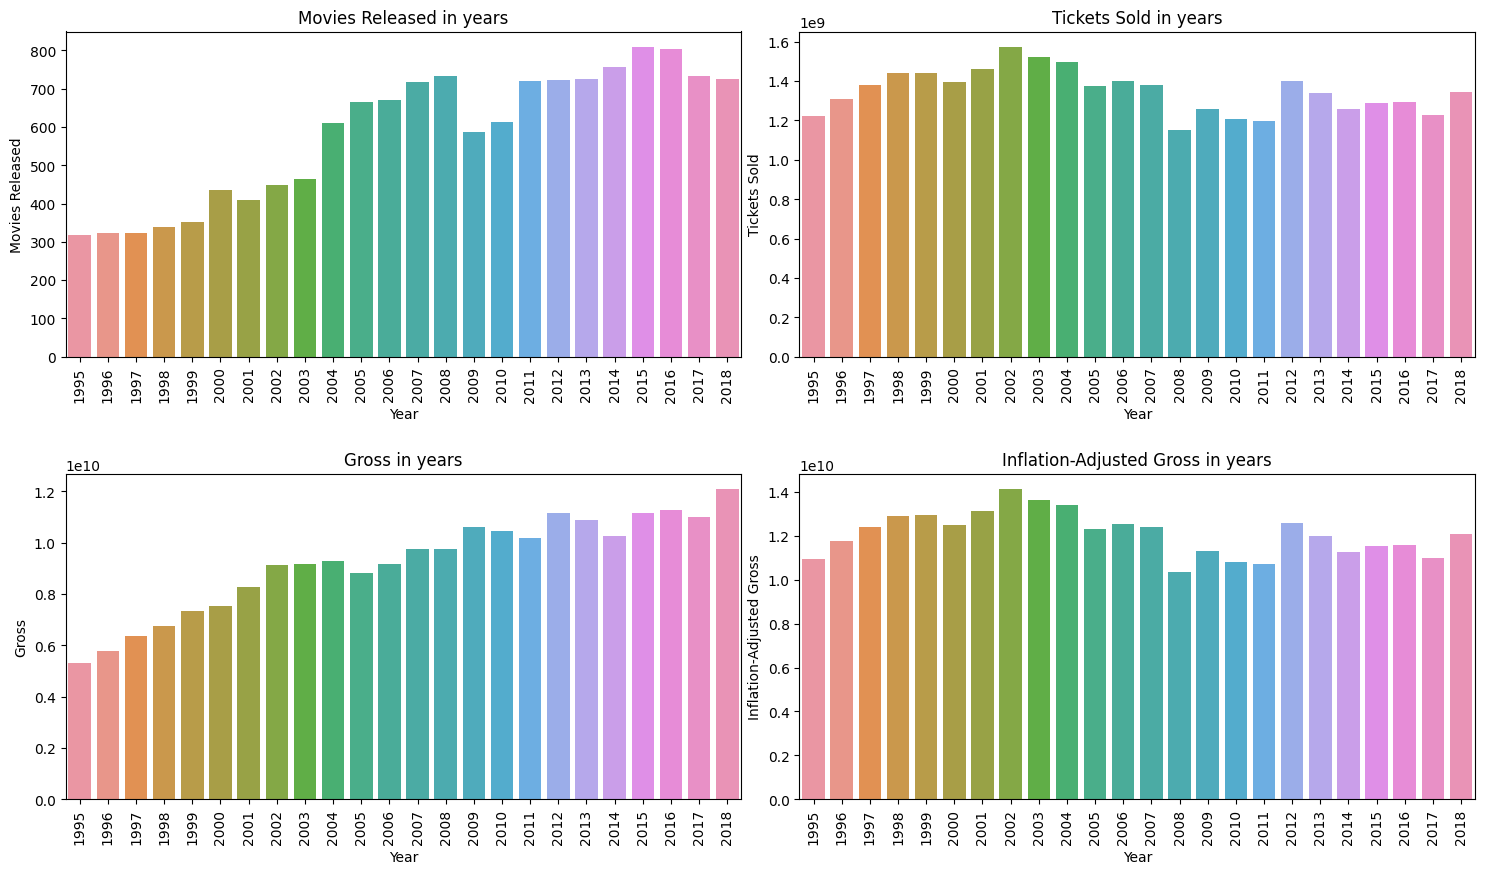

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

s_axes  = axes.flatten()
c_axes=0

for i in f_year_data.columns:
  sns.barplot(data=f_year_data,x=f_year_data.iloc[:,:0].index,y=i,ax=s_axes[c_axes])
  s_axes[c_axes].set_title(f'{i} in years')
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=90)
  c_axes+=1

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
plt.show()

**summary for Genre in Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross for across the years **

In [7]:
f_genara_data=f_data.pivot_table(values=['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross'],index=['Genre'],aggfunc='sum')
f_genara_data=f_genara_data[['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross']]
f_genara_data

,Movies Released,Tickets Sold,Gross,Inflation-Adjusted Gross
Genre,,,,
Action,956,6286733017,44521195322,56391995163
Adventure,1005,8480812819,59706519928,76072890986
Comedy,2230,5040638417,33178178901,45214526601
Concert or Performance,63,49778298,389502940,446511334
Dark Comedy,174,208096184,1469144207,1866622769
Documentary,2143,322824020,2147962688,2895731460
Drama,4997,5474189407,35781438365,49103478983
Horror,553,1572563195,10894902714,14105891860
Multiple Genres,39,3676146,30056564,32975028


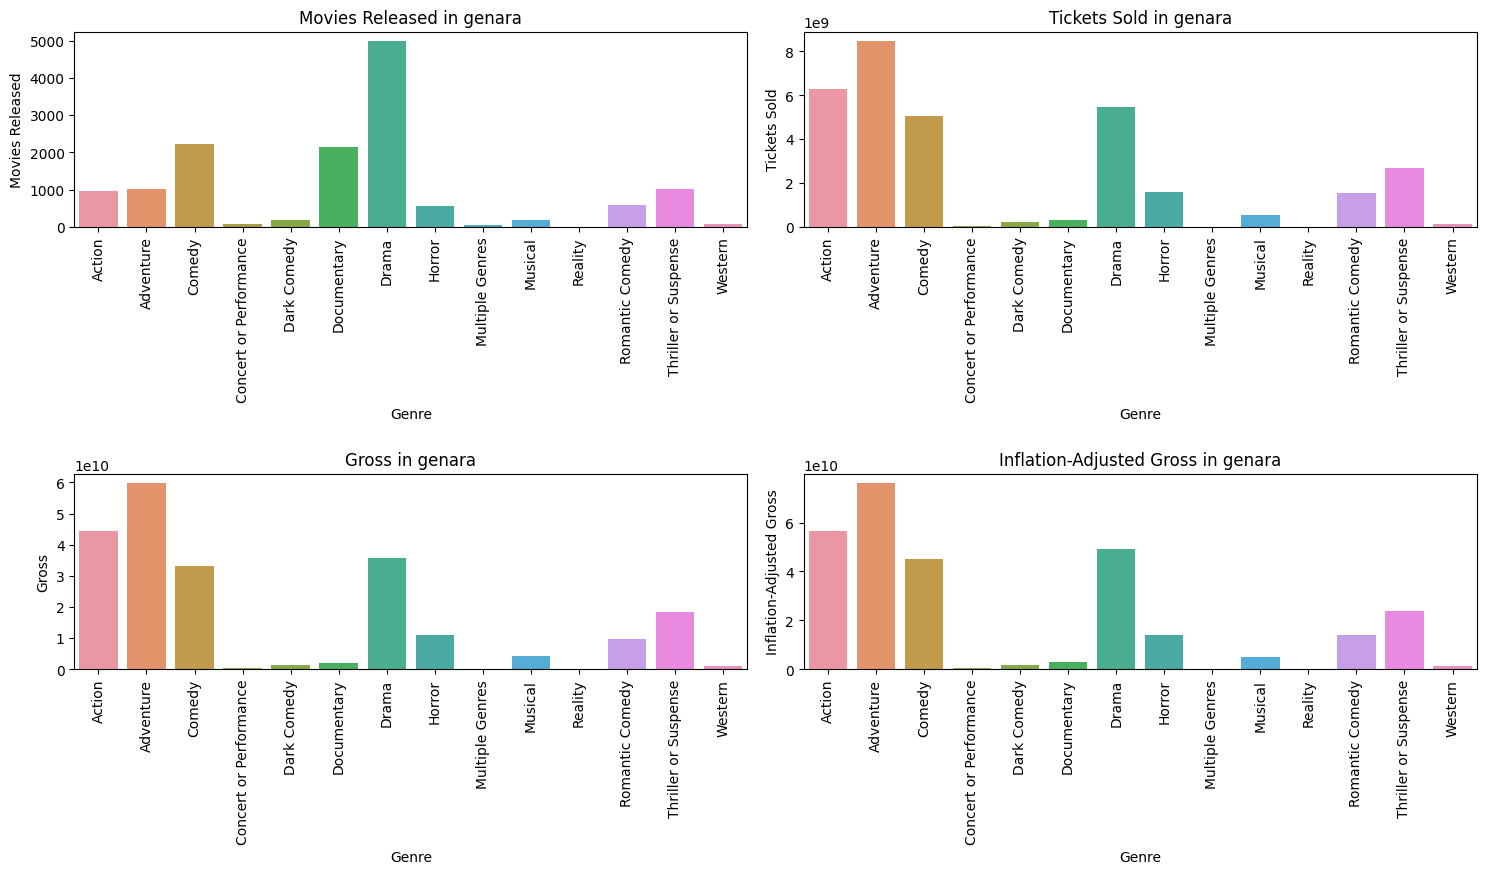

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

s_axes  = axes.flatten()
c_axes=0

for i in f_genara_data.columns:
  sns.barplot(data=f_genara_data,x=f_genara_data.iloc[:,:0].index,y=i,ax=s_axes[c_axes])
  s_axes[c_axes].set_title(f'{i} in genara')
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=90)
  c_axes+=1

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
plt.show()

**Summary for Genre for Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross per' year**

In [9]:
f_year_genras_data=f_data.pivot_table(values=['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross'],index=['Year','Genre'],aggfunc='sum')
f_year_genras_data=f_year_genras_data.sort_values(by='Year')
f_year_genras_data=f_year_genras_data[['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross']]
f_year_genras_data

Movies Released  Tickets Sold       Gross  \
Year Genre                                                    
1995 Action                    29     241274531  1049544278   
     Adventure                 29     177358047   771507571   
     Comedy                    61     241125423  1048895722   
     Dark Comedy                3       5559905    24185598   
     Documentary                9      18849263    81994311   
...                           ...           ...         ...   
2018 Comedy                    74      96479734   865423455   
     Adventure                 49     331494935  2973509668   
     Action                    59     461768924  4142067464   
     Drama                    266     181897975  1631625937   
     Western                    7       3724495    33408750   

                  Inflation-Adjusted Gross  
Year Genre                                  
1995 Action                     2164232543  
     Adventure                  1590901682  
     Comedy                     2162895044  
     Dark Comedy                  49872348  
     Documentary                 169077889  
...                                    ...  
2018 Comedy                      865423214  
     Adventure                  2973509567  
     Action                     4142067248  
     Drama                      1631624836  
     Western                      33408720  

[300 rows x 4 columns]

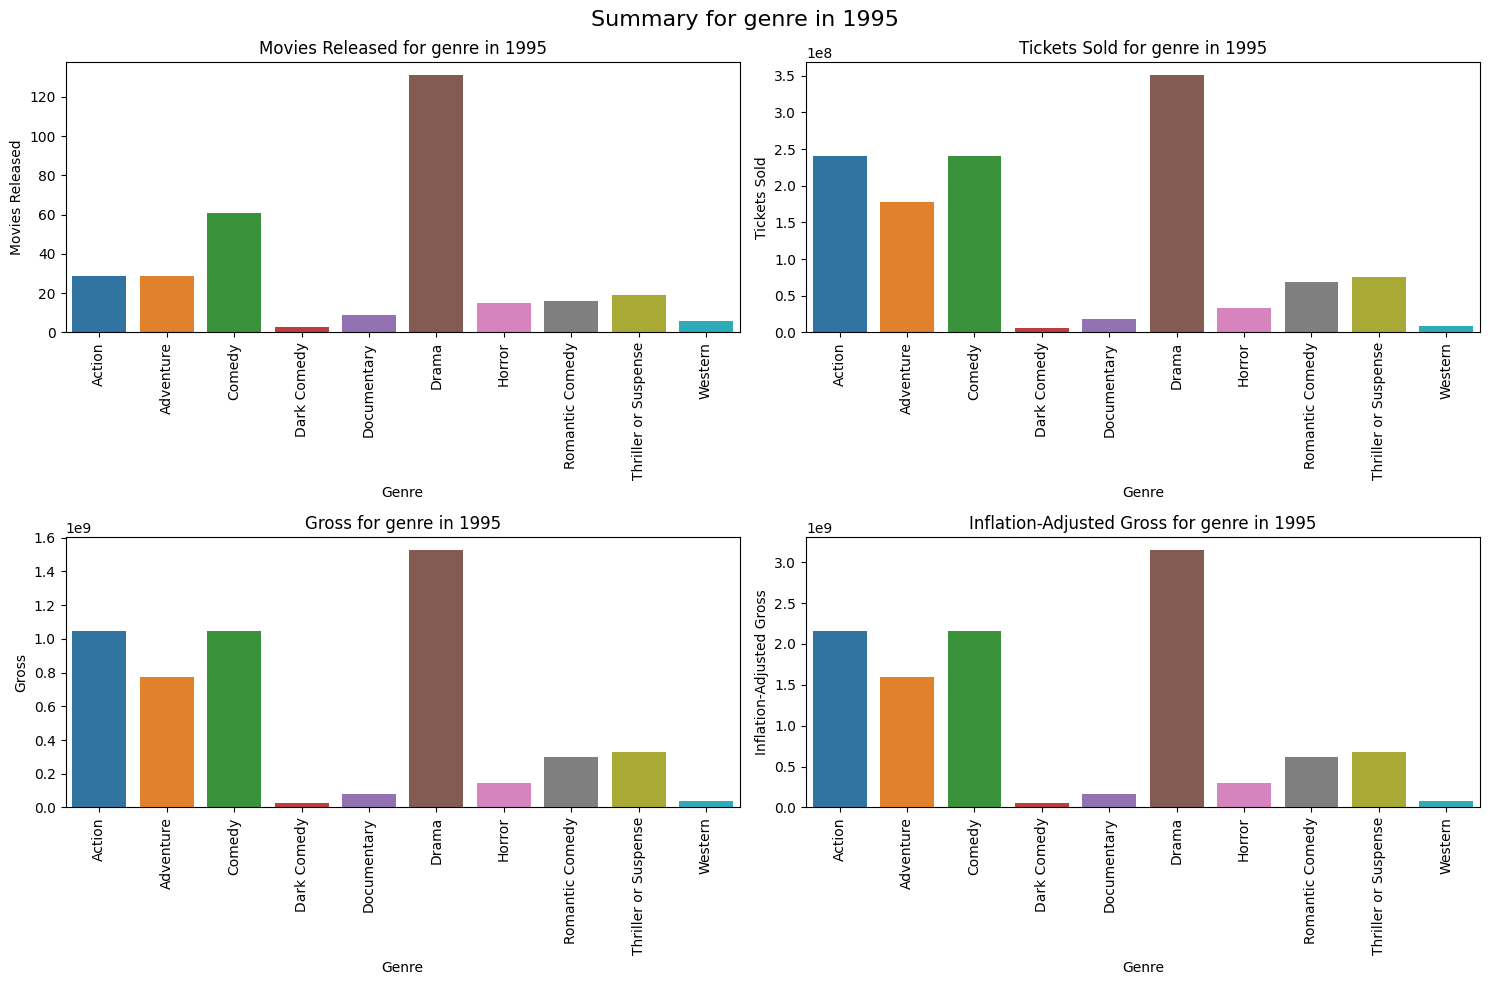

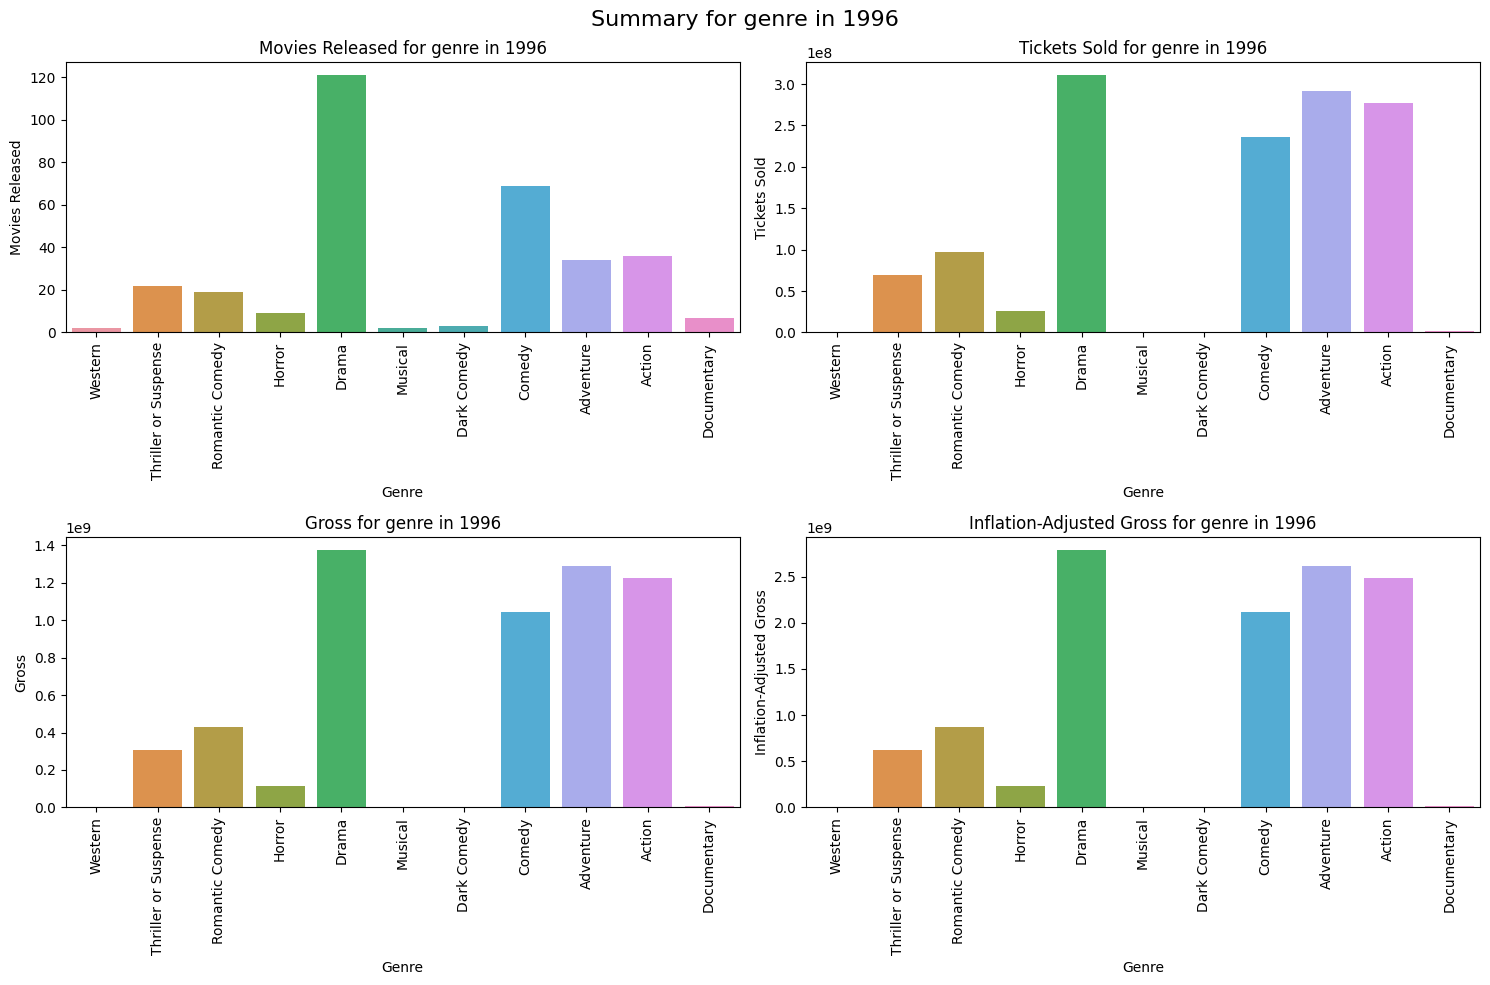

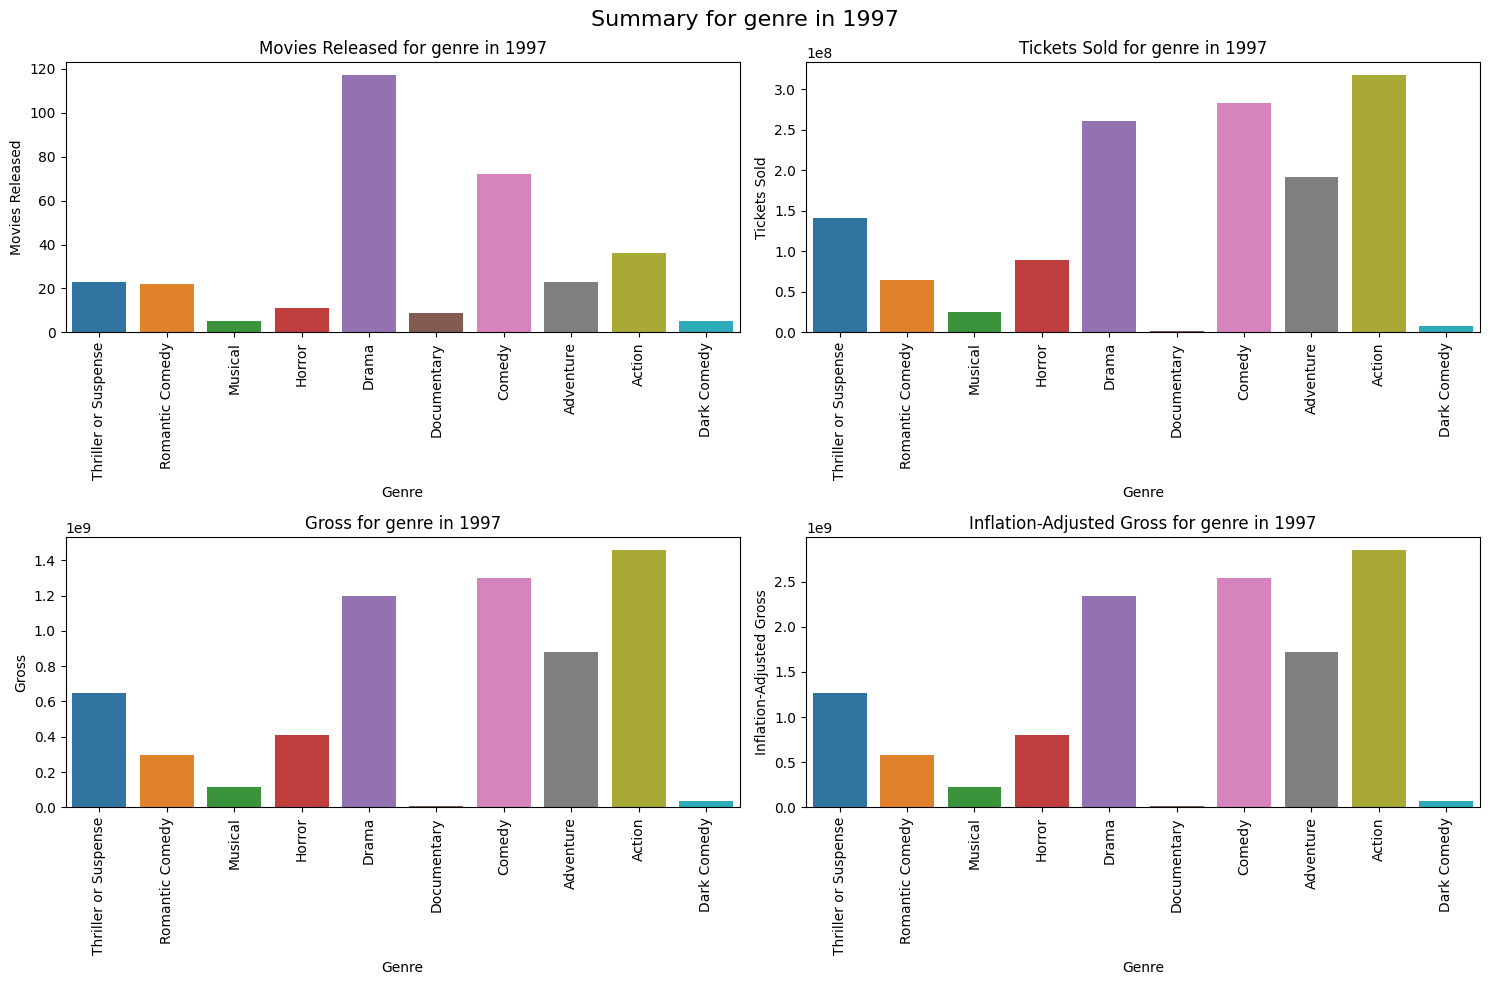

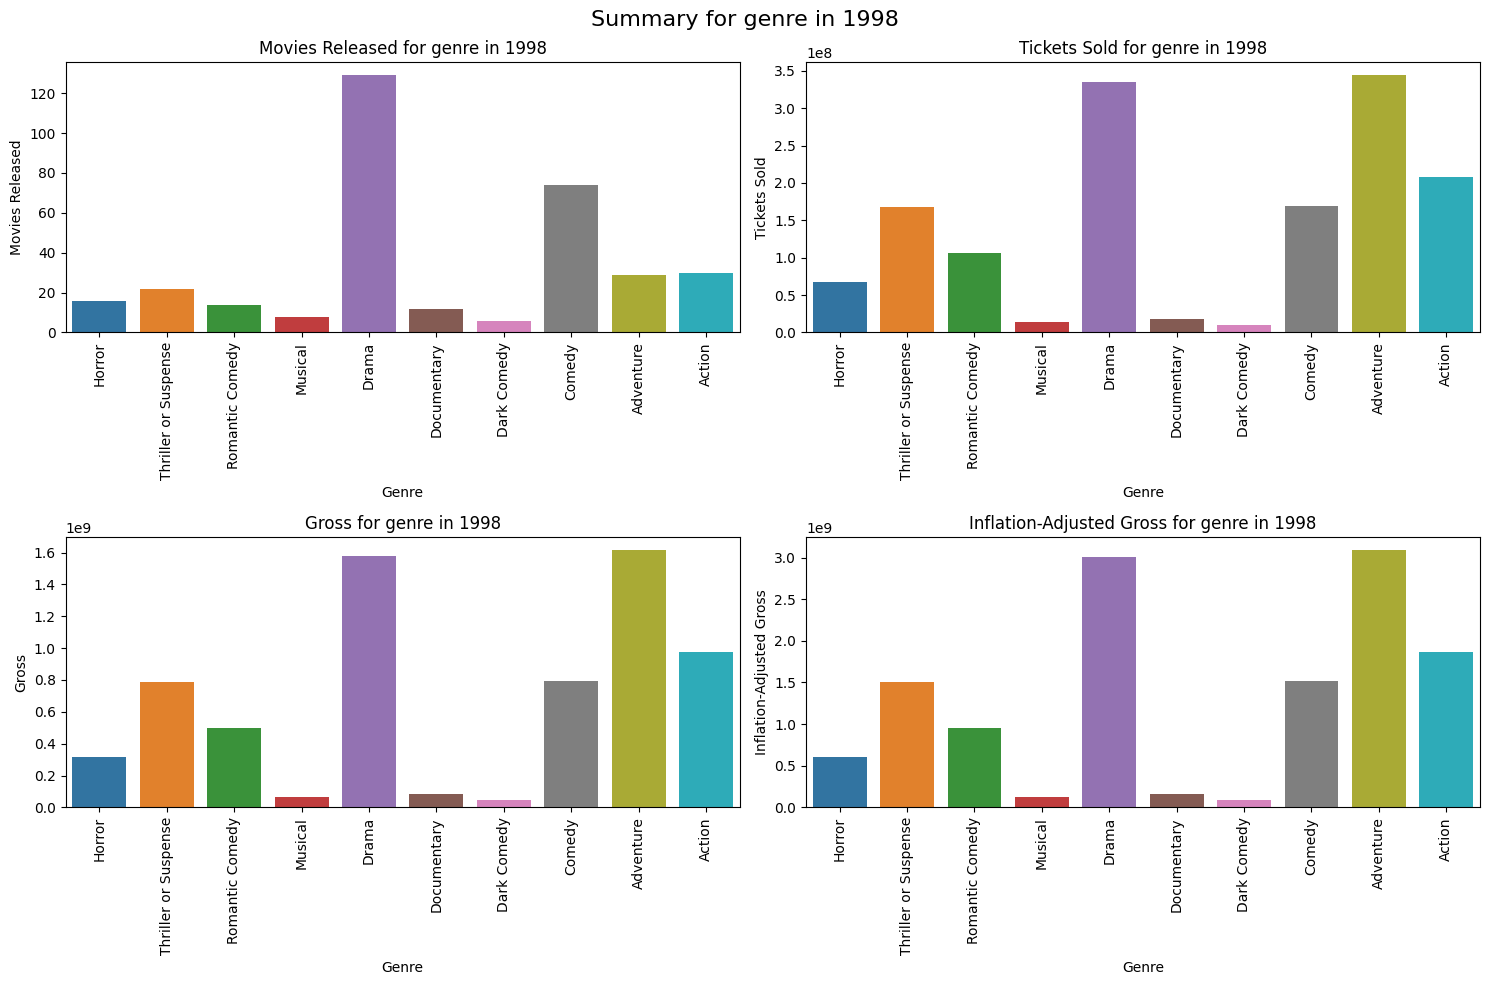

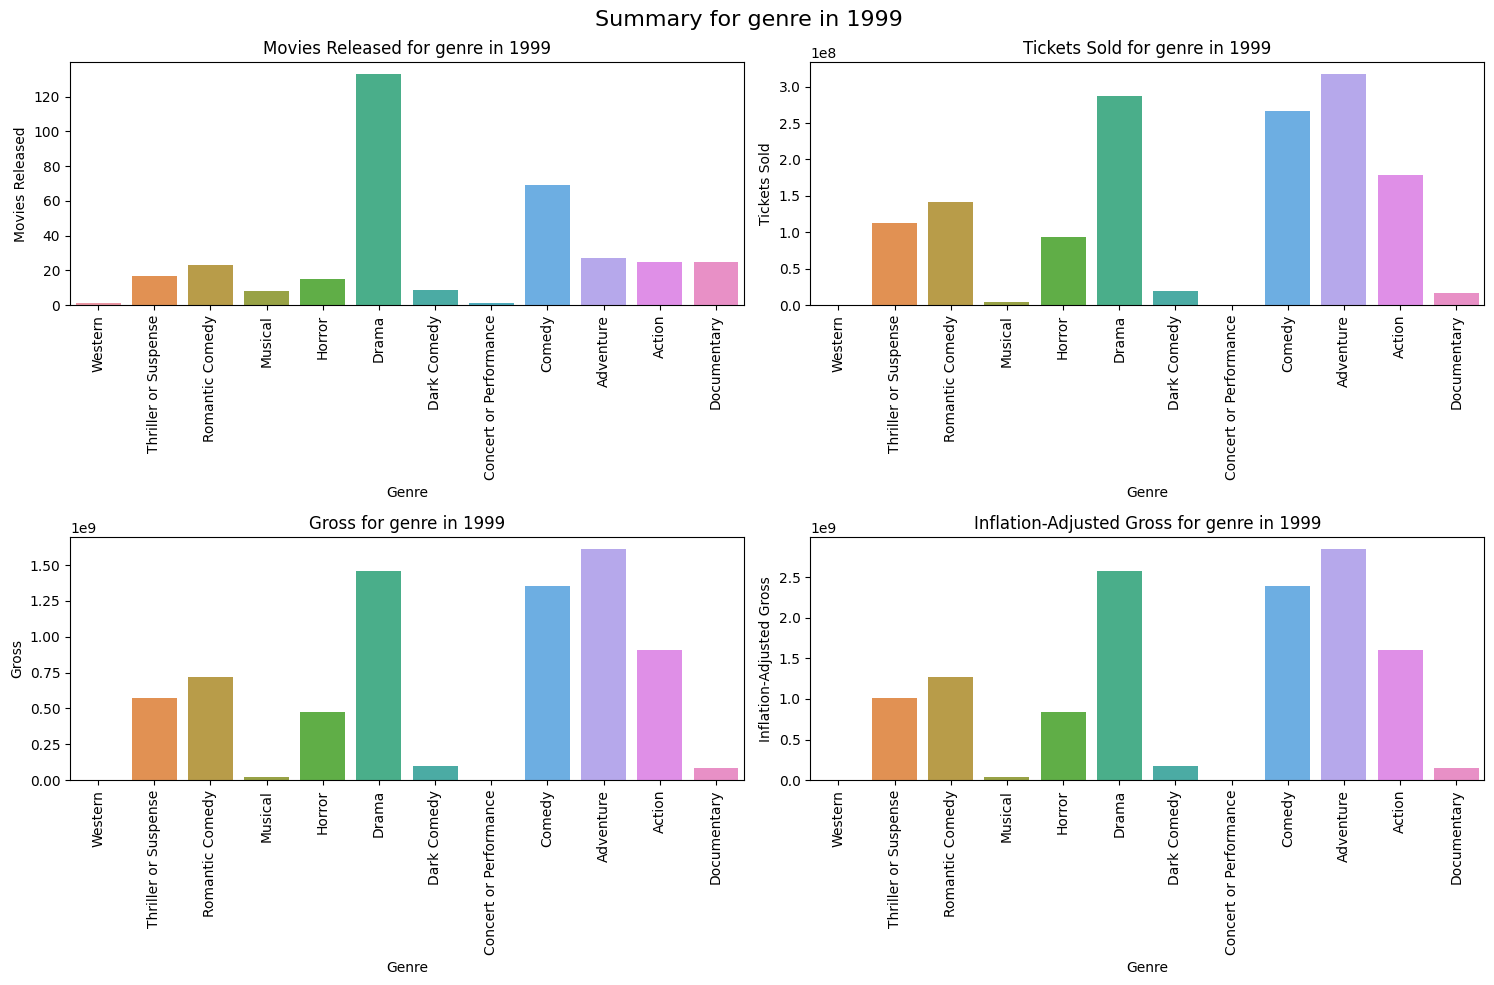

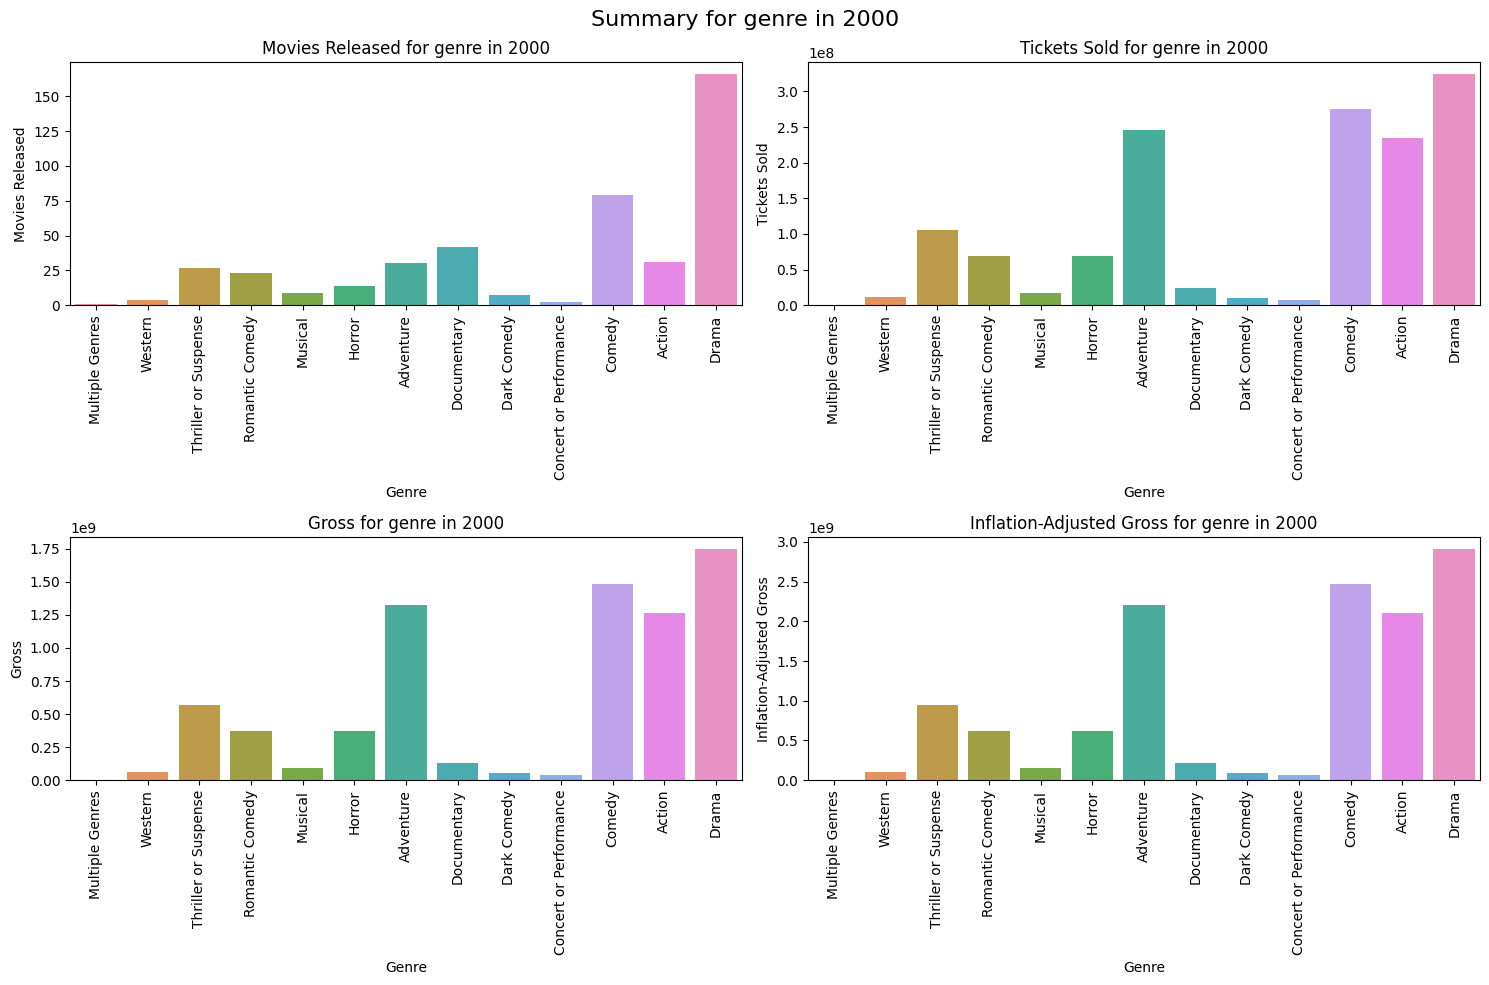

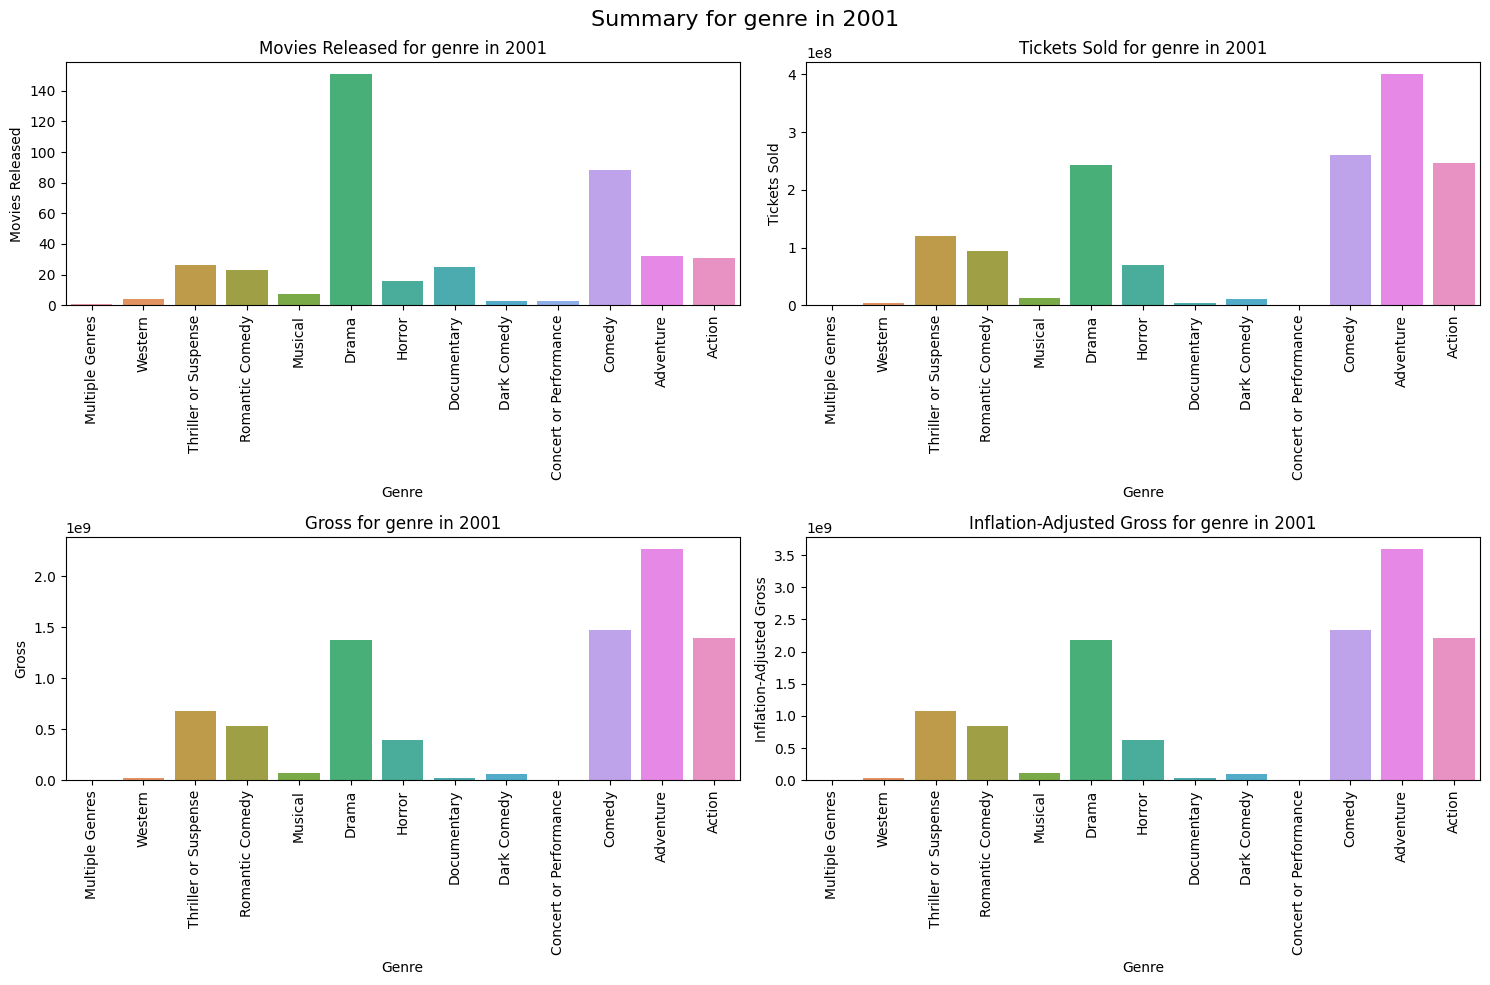

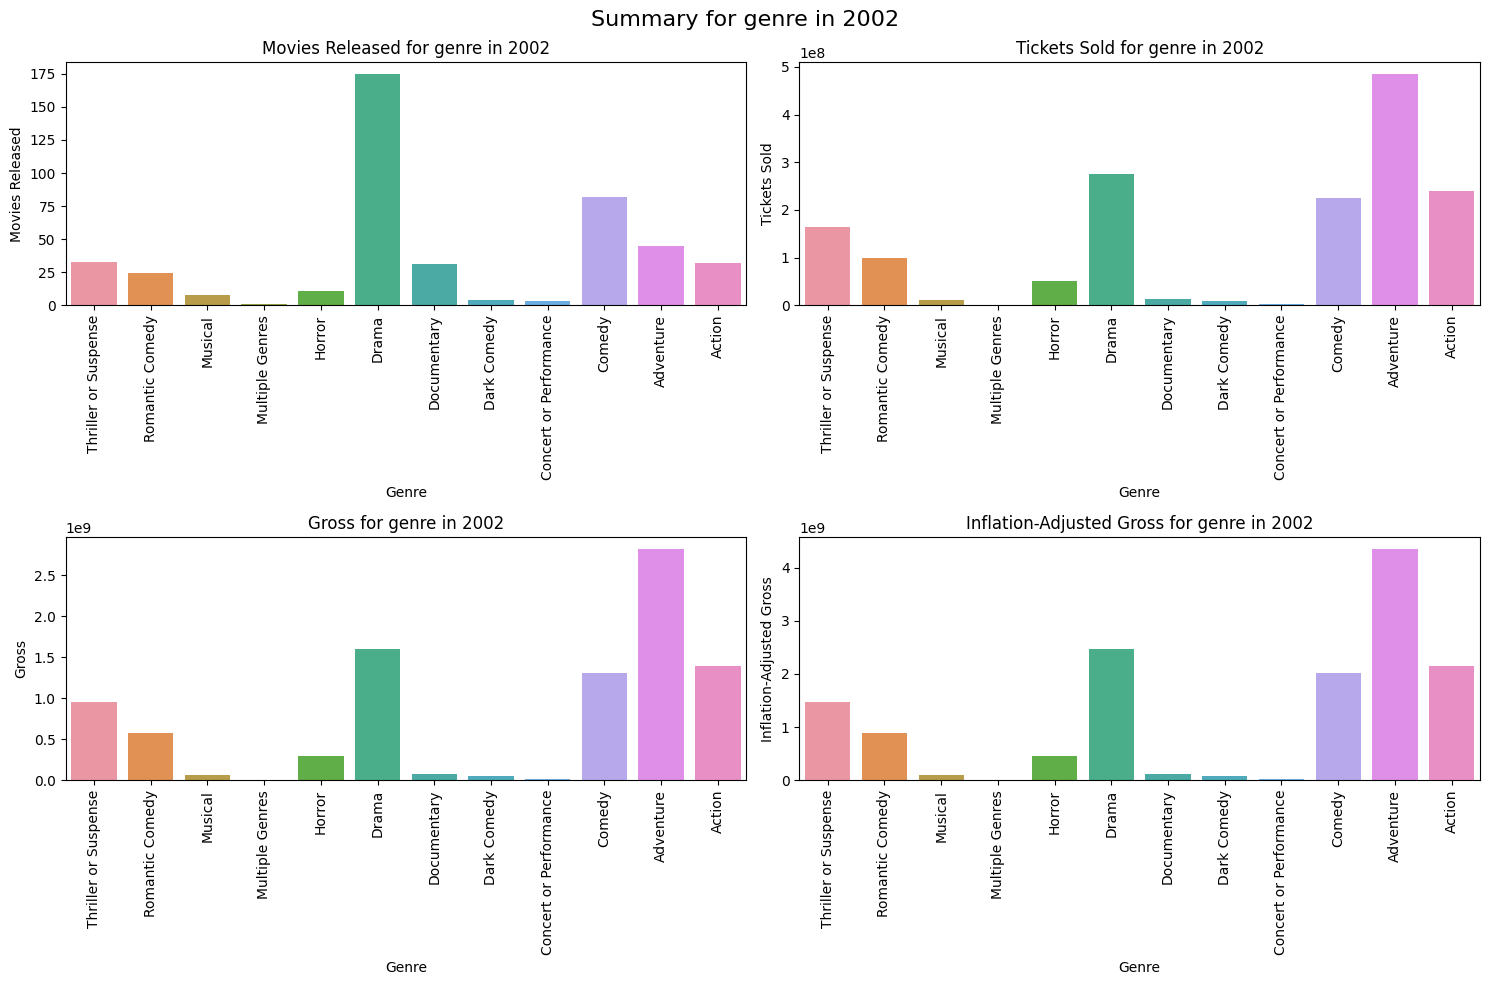

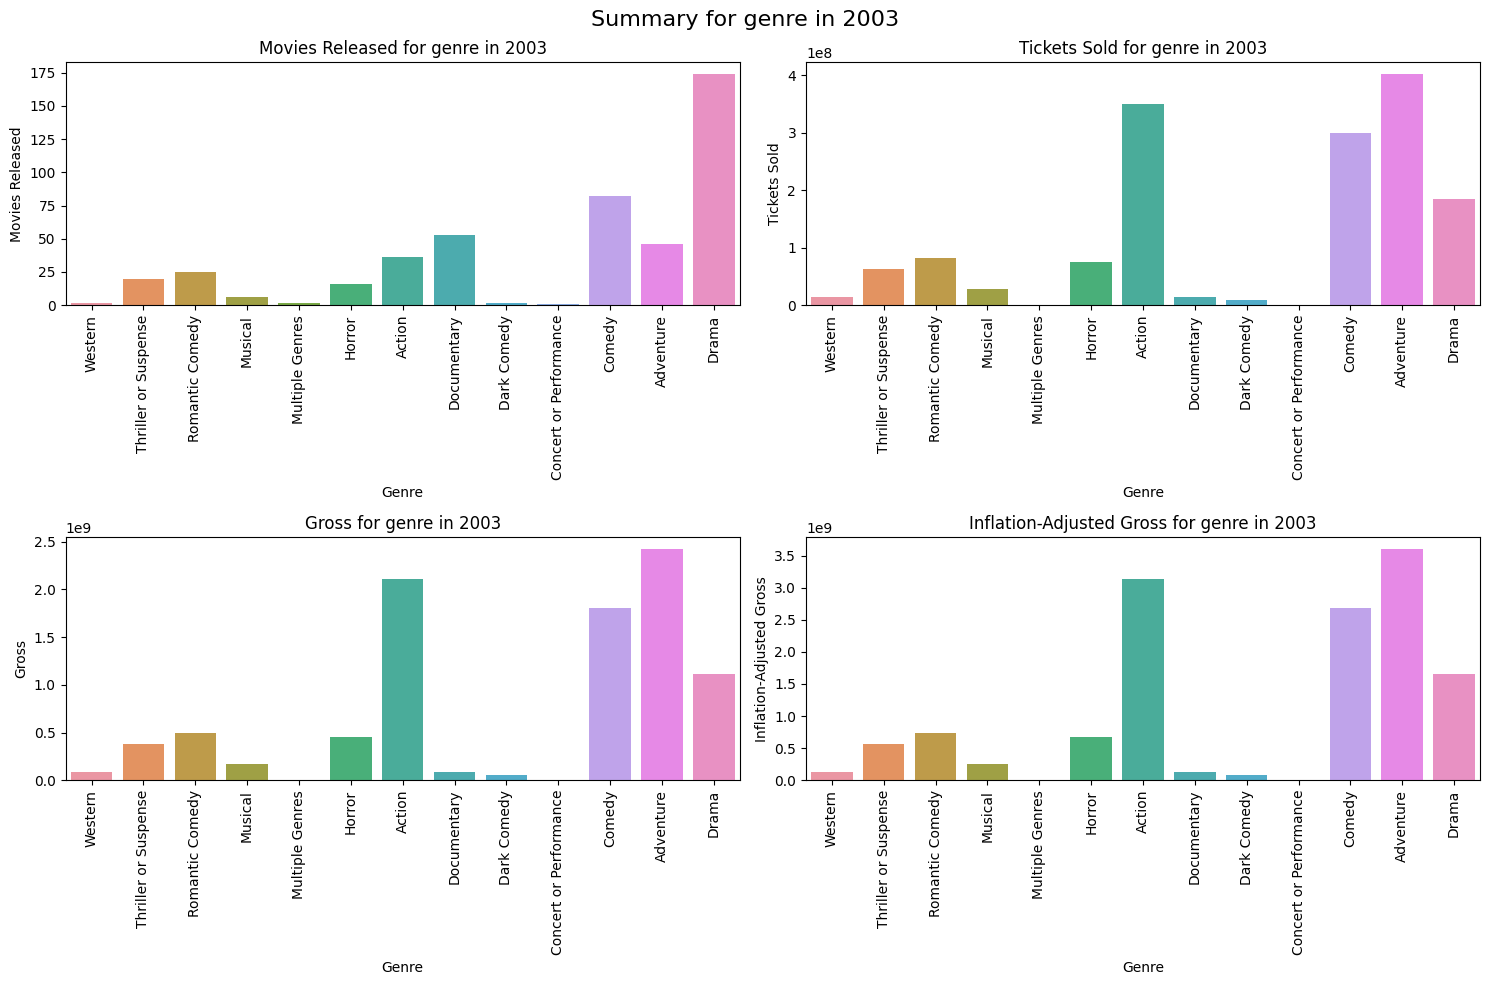

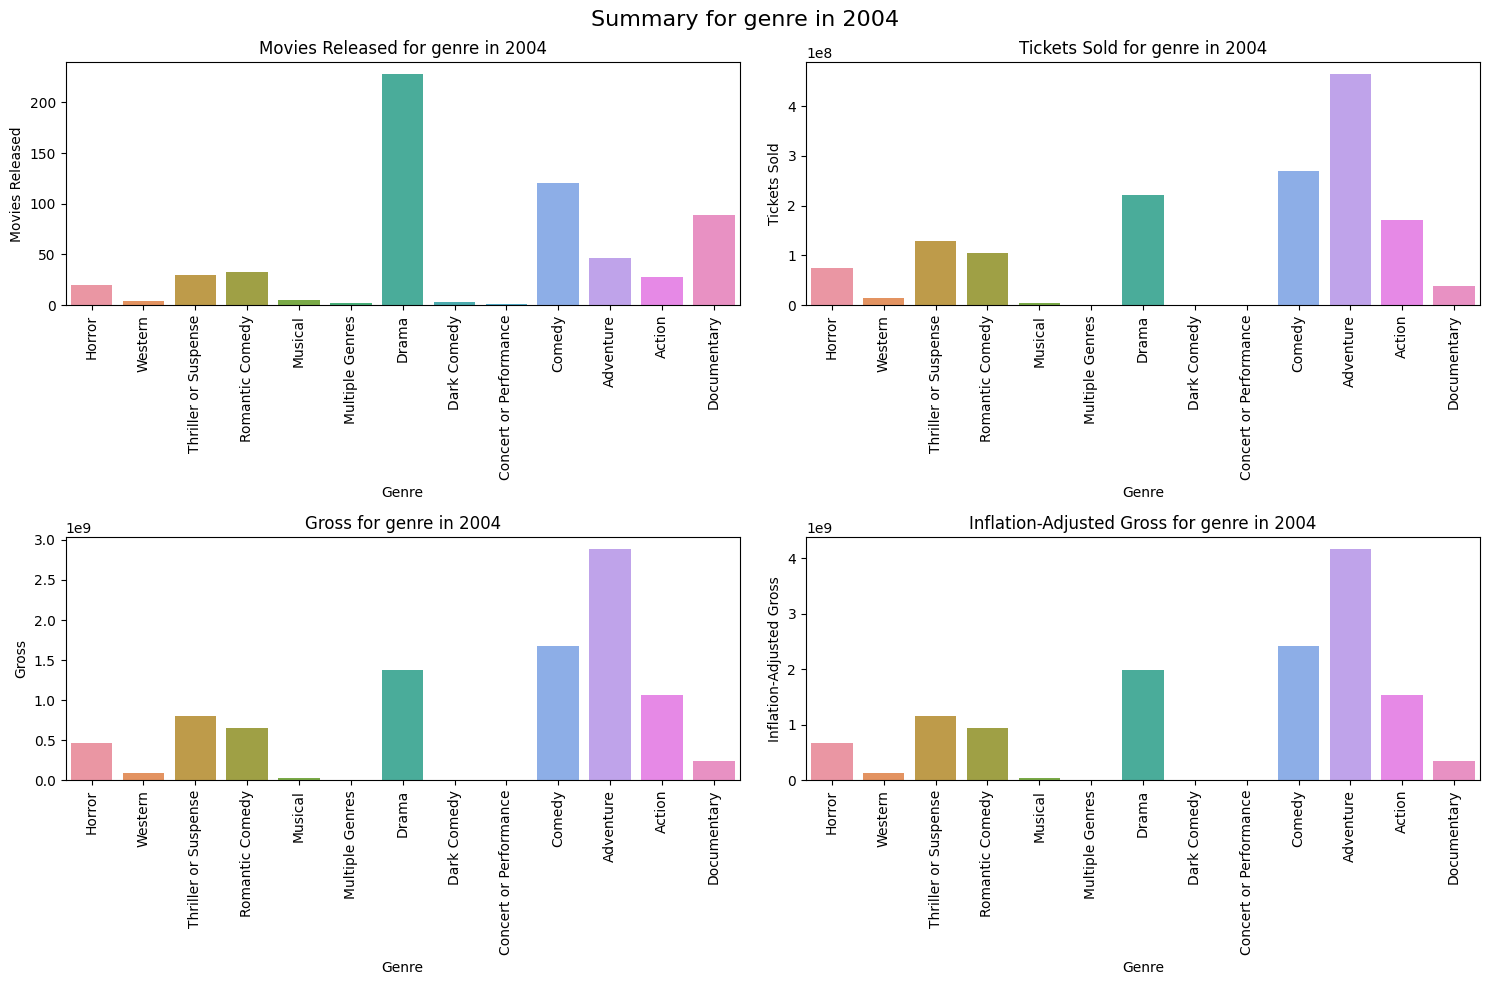

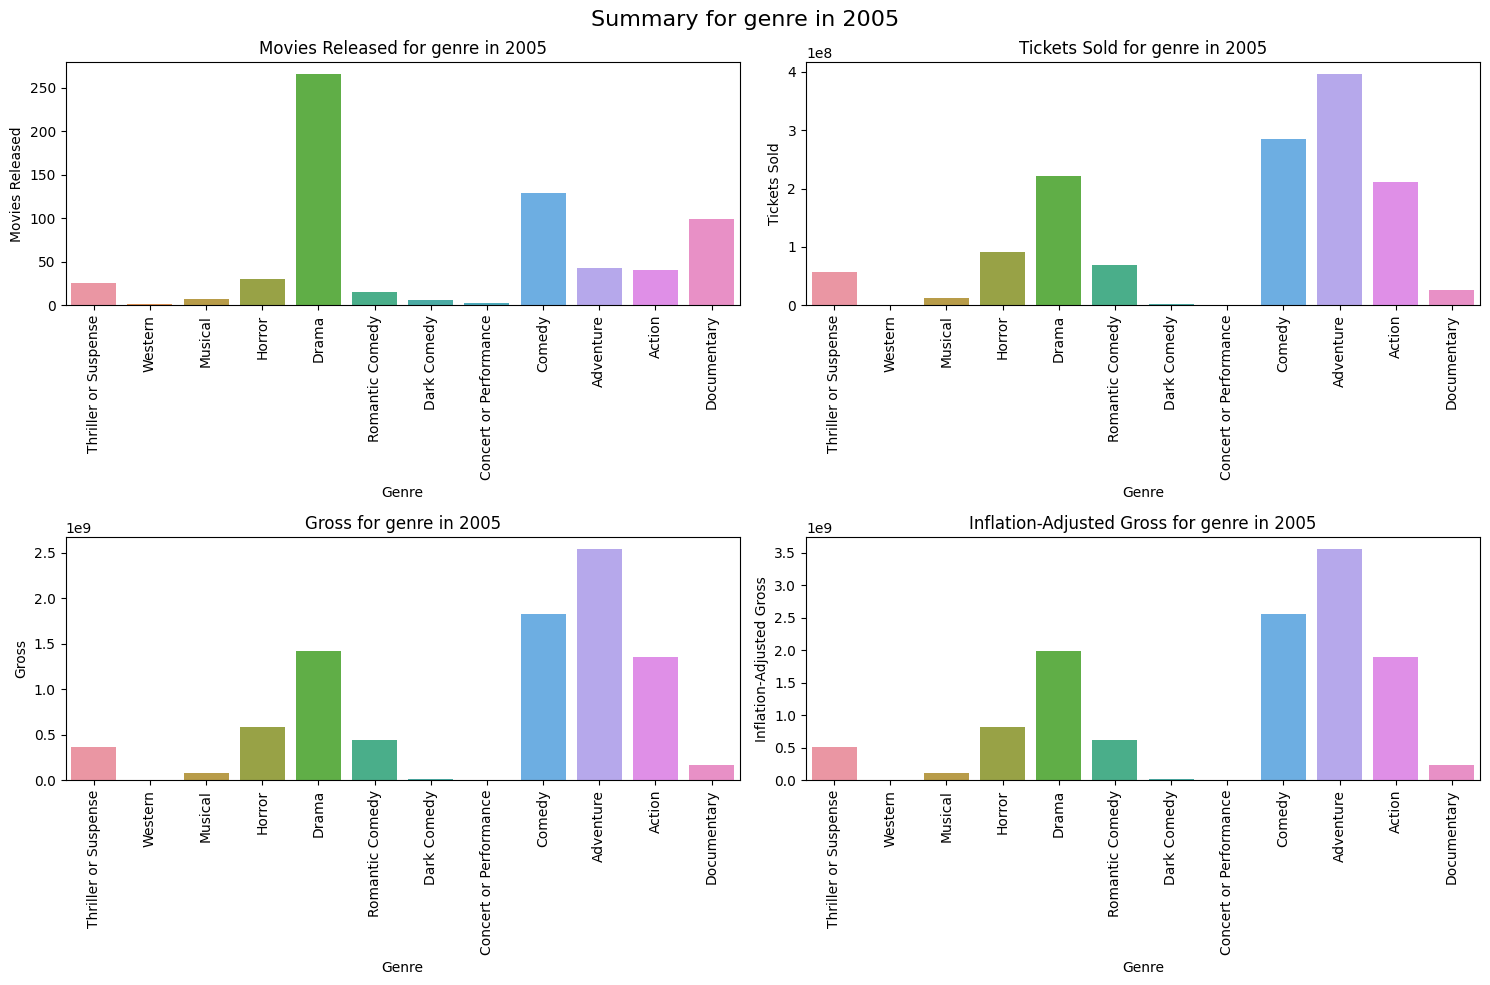

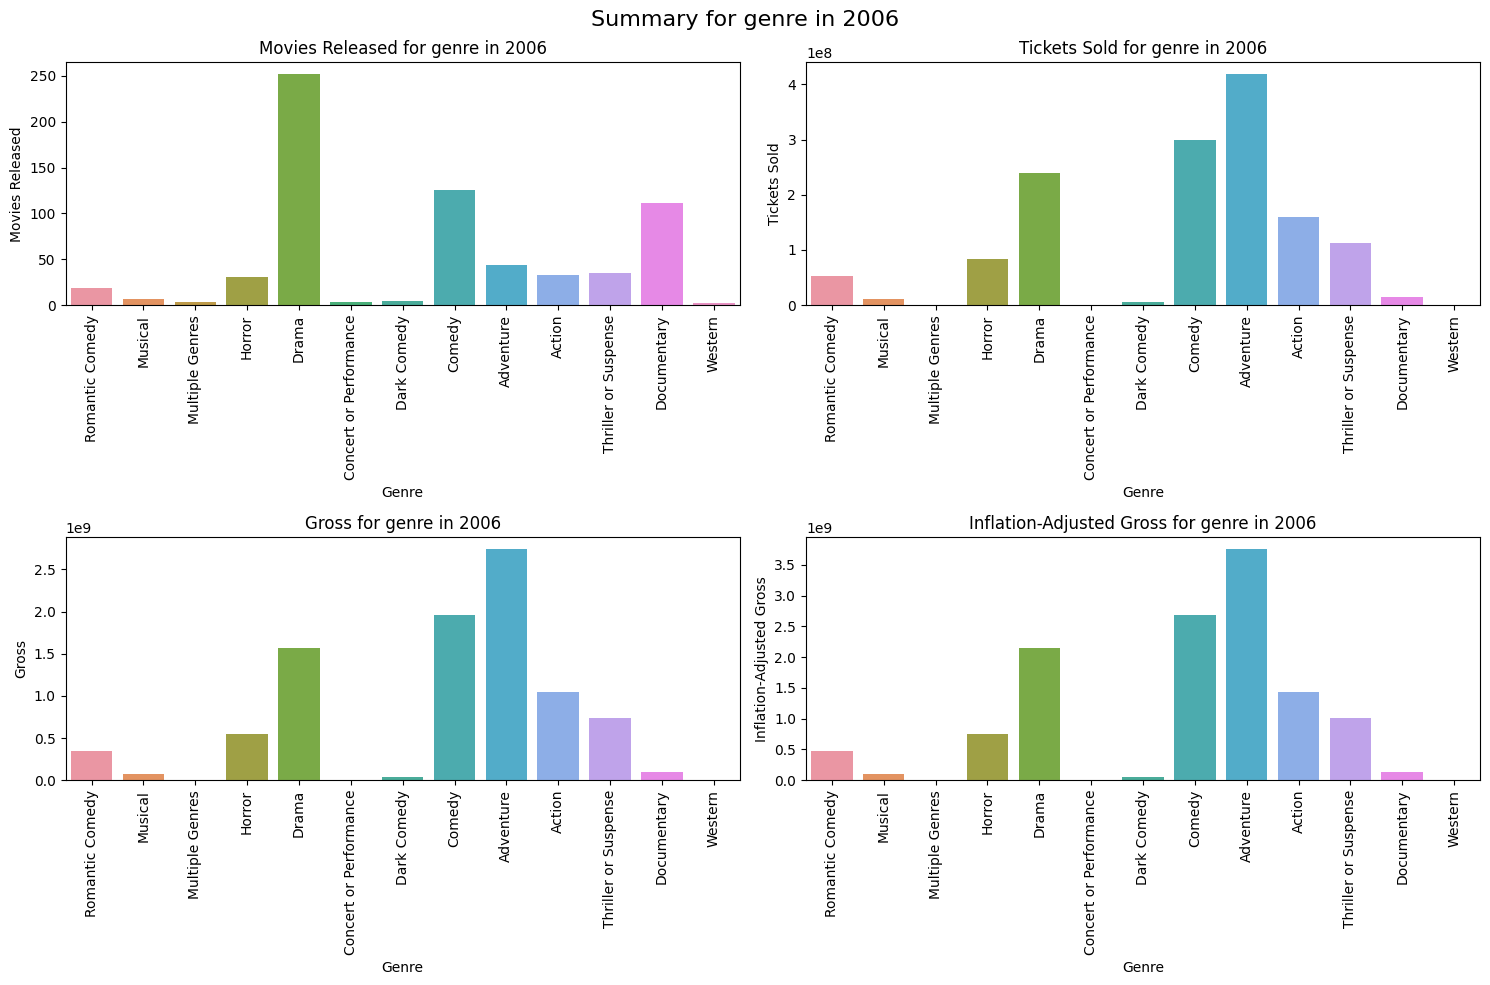

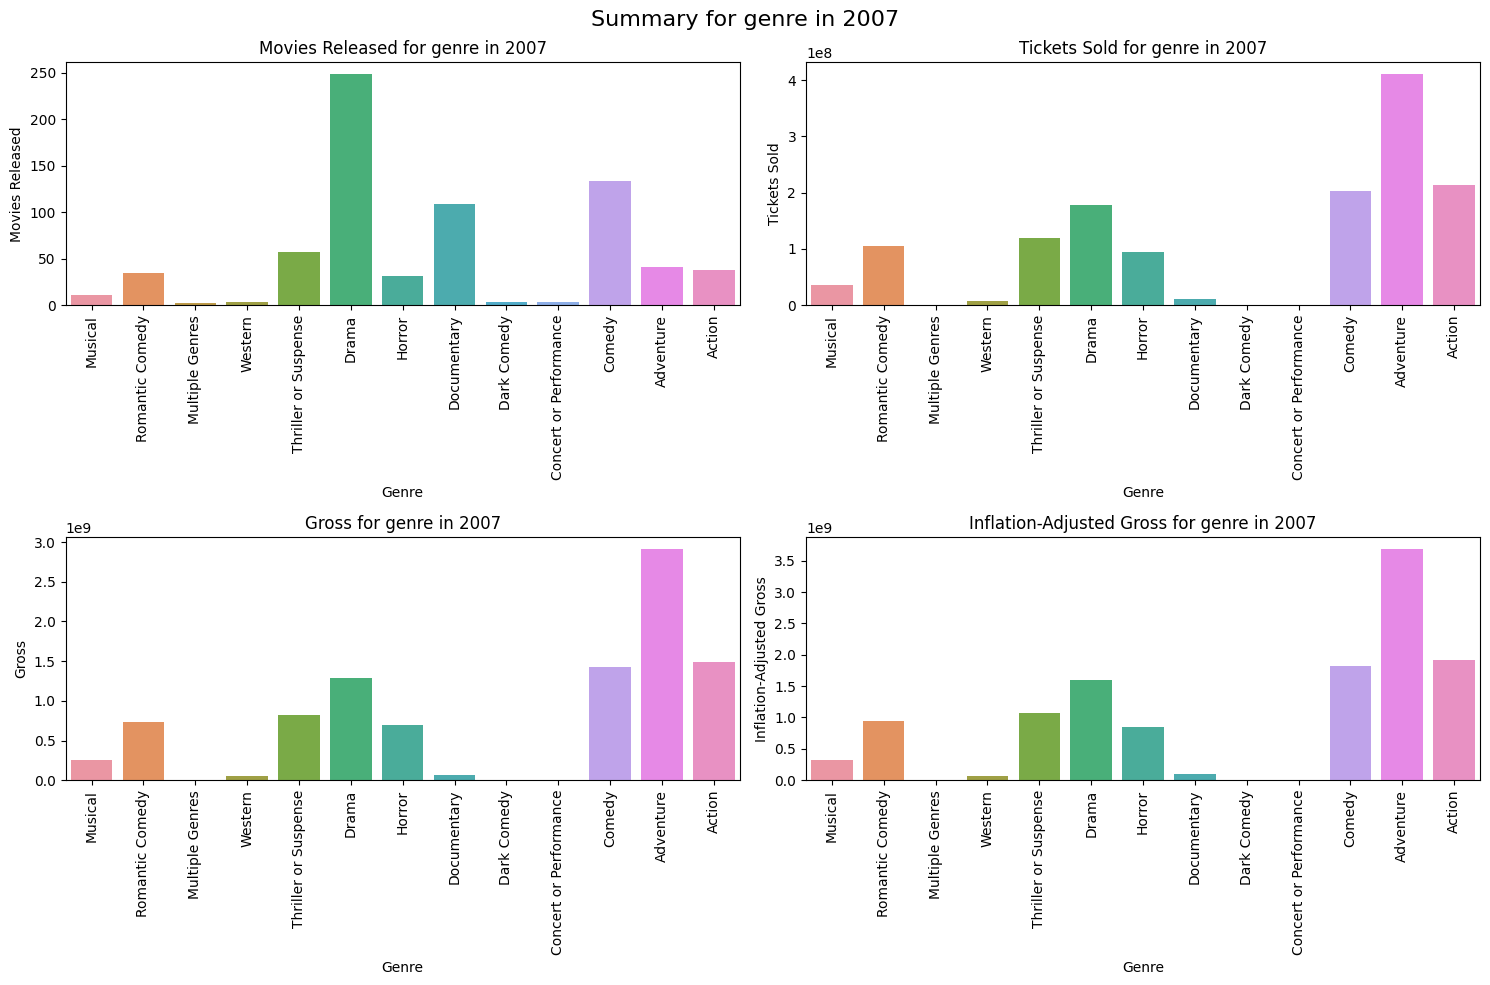

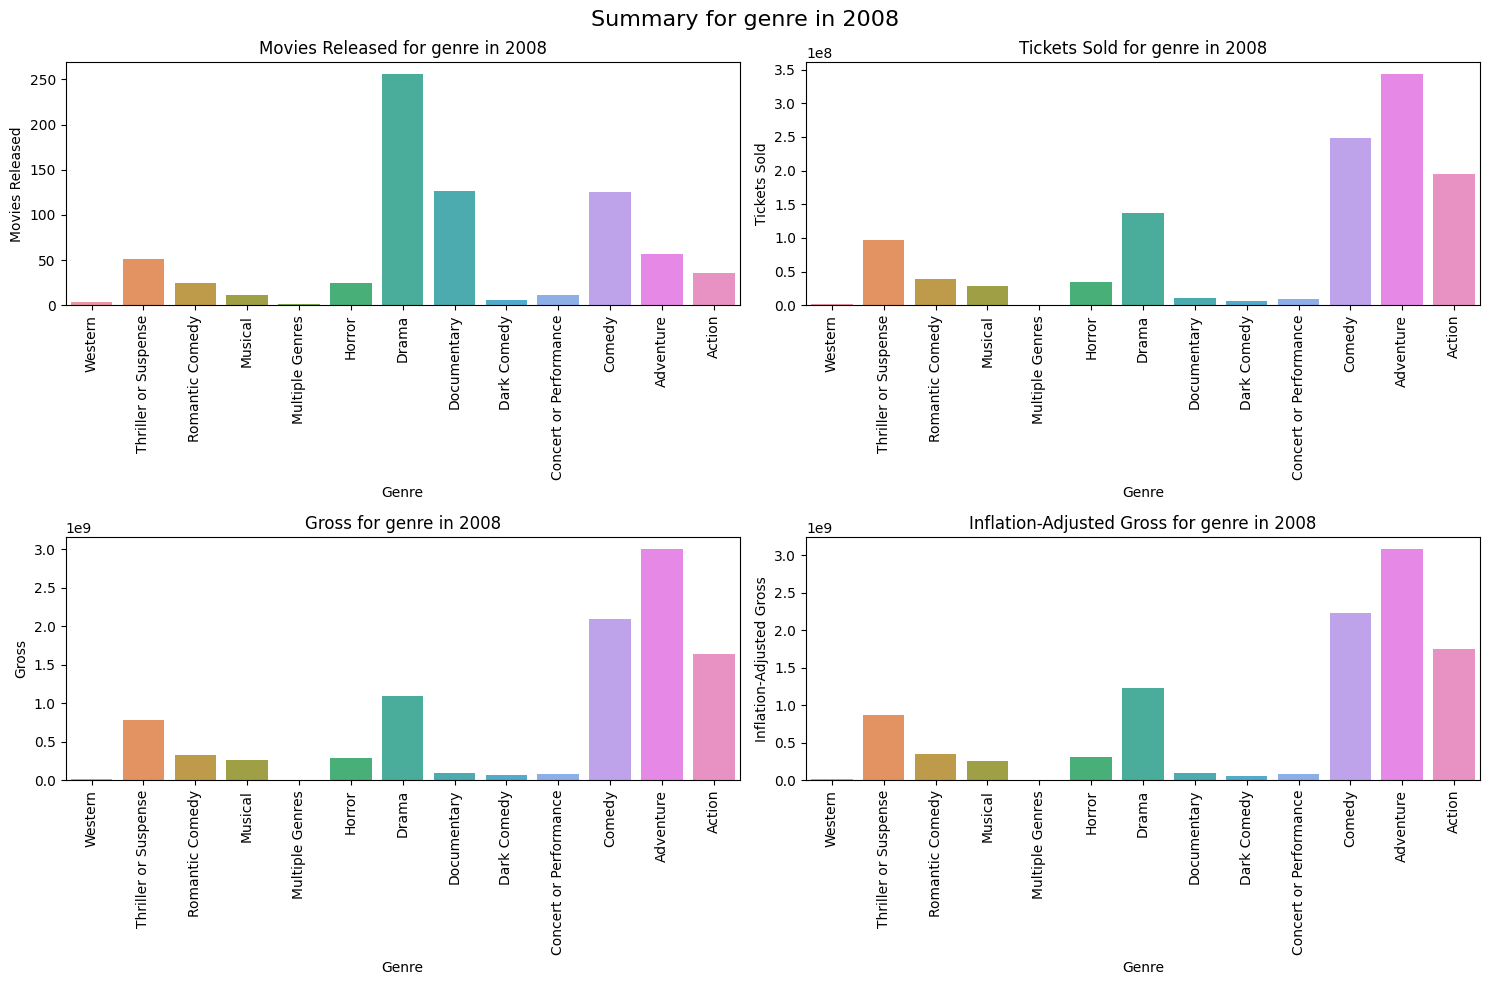

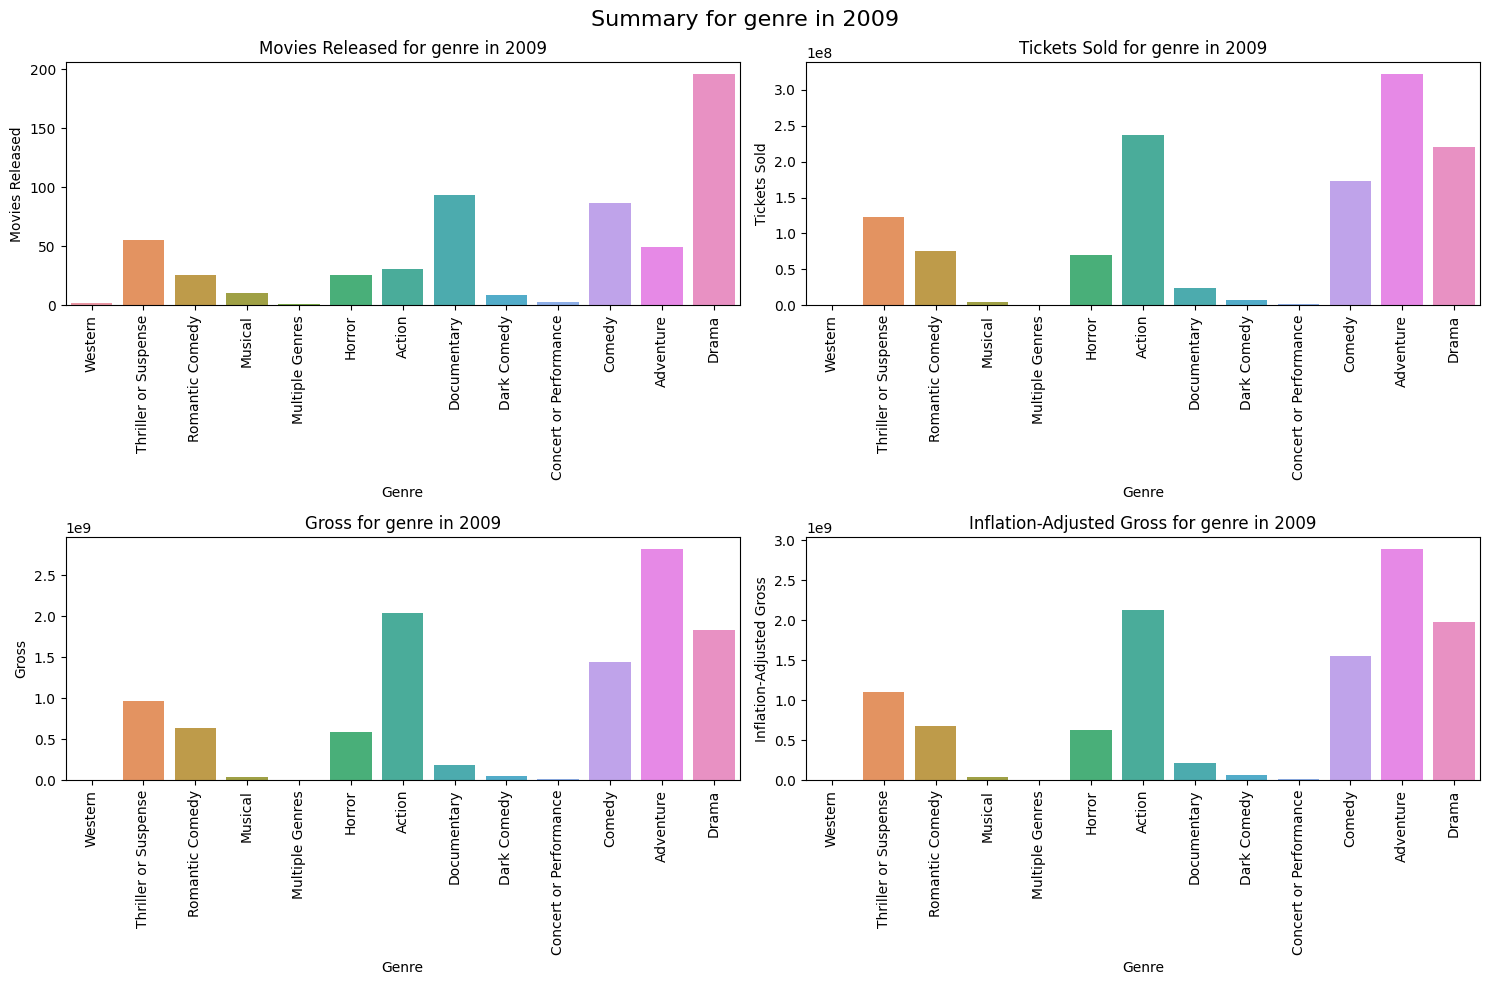

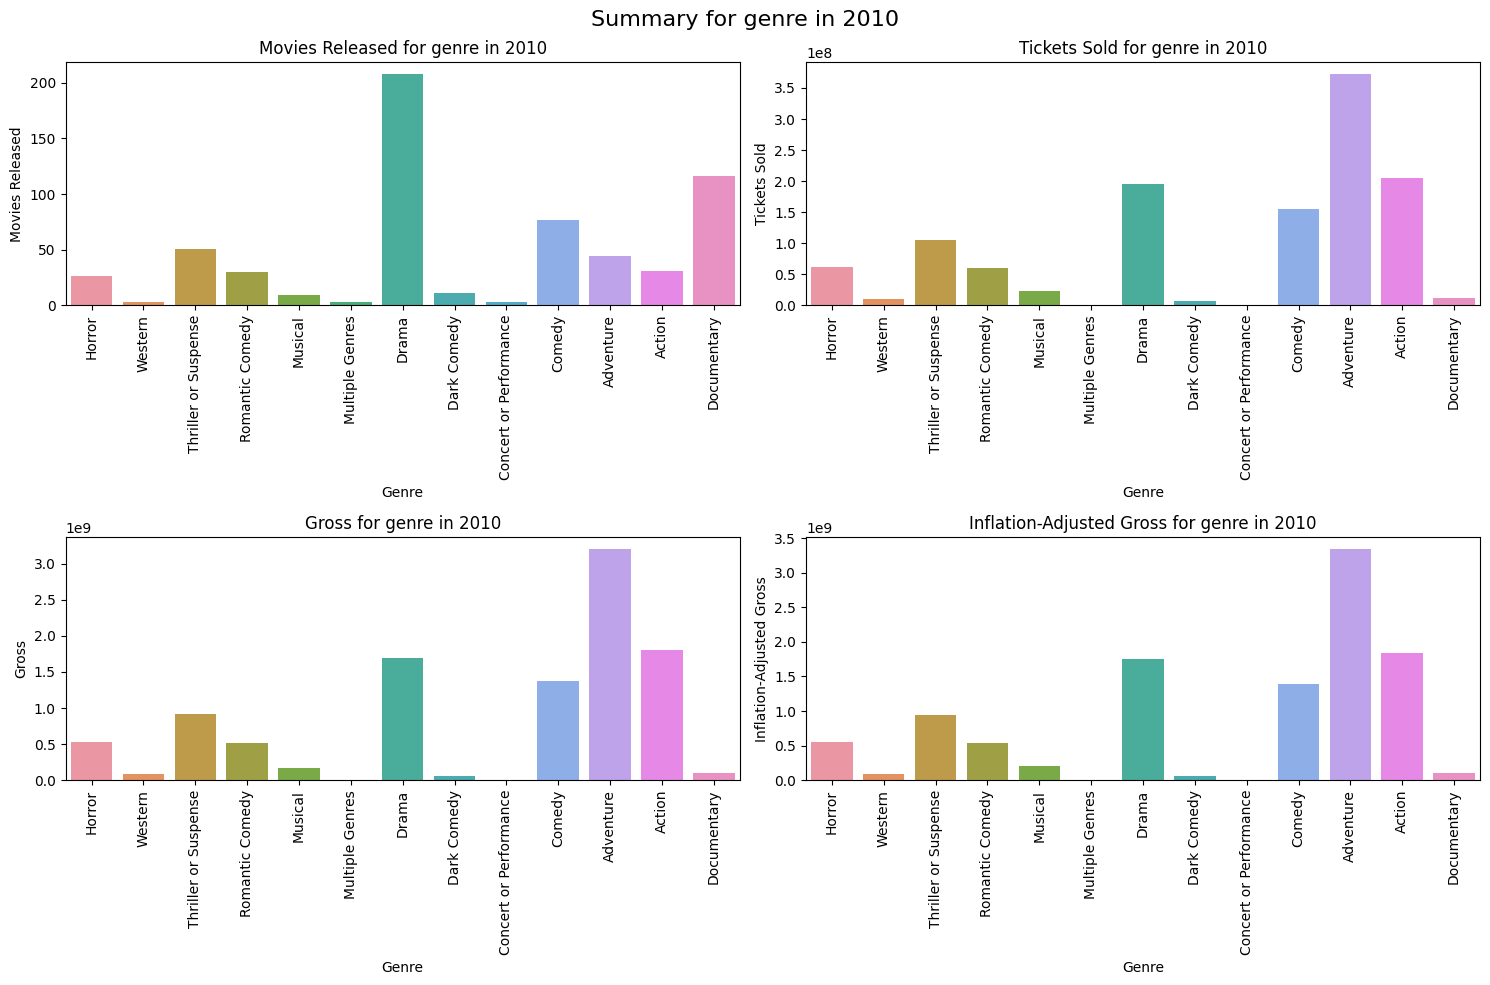

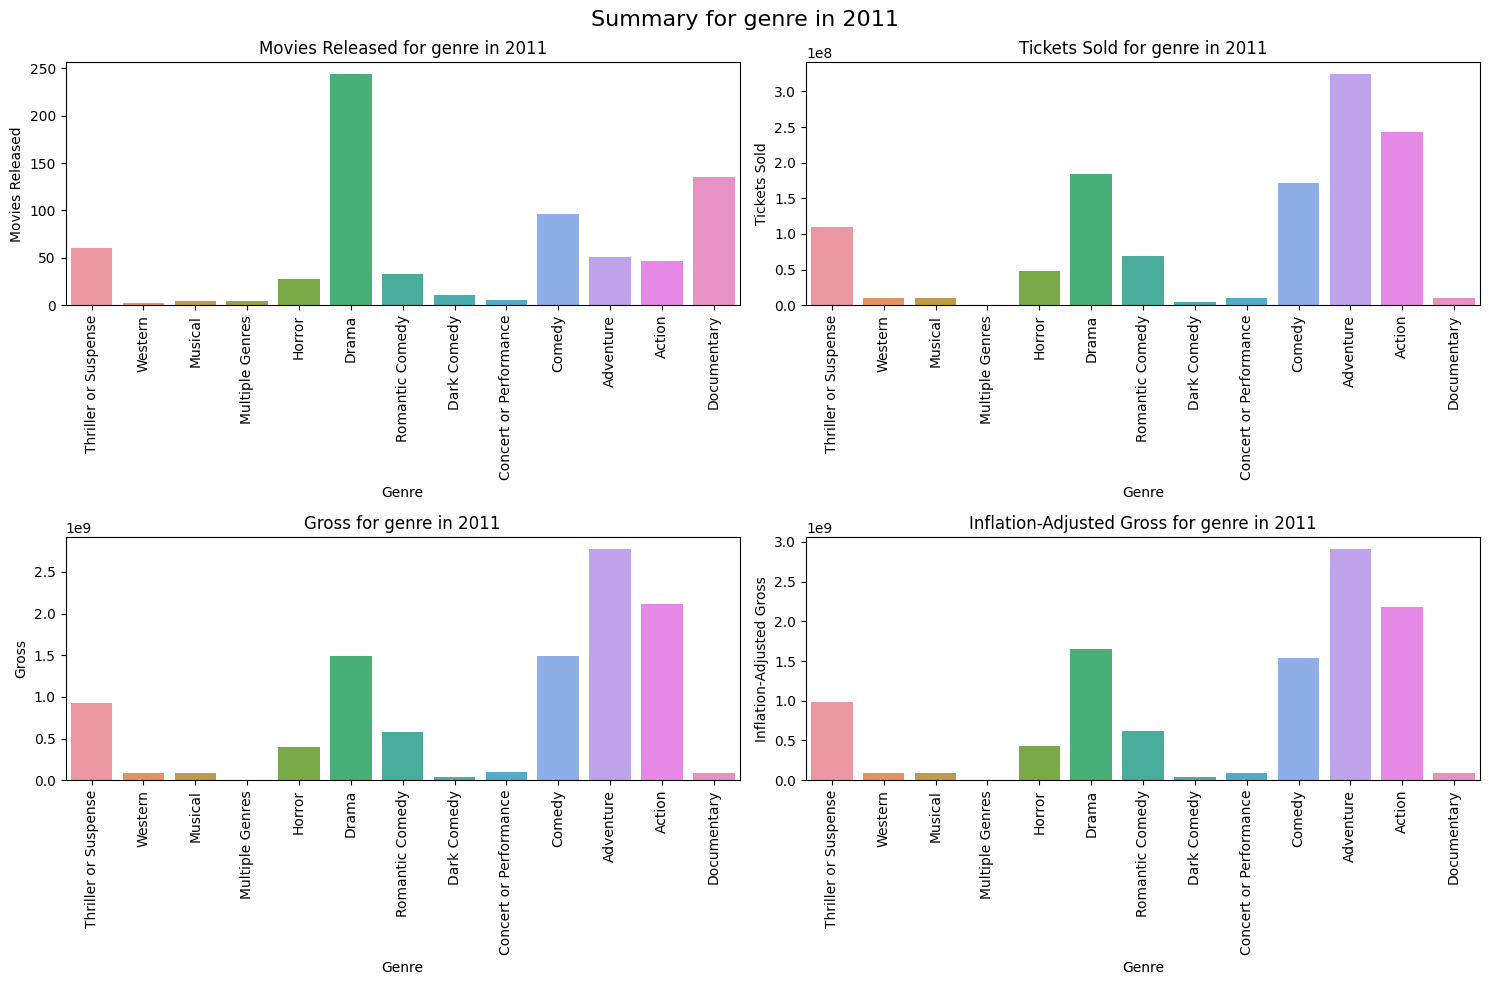

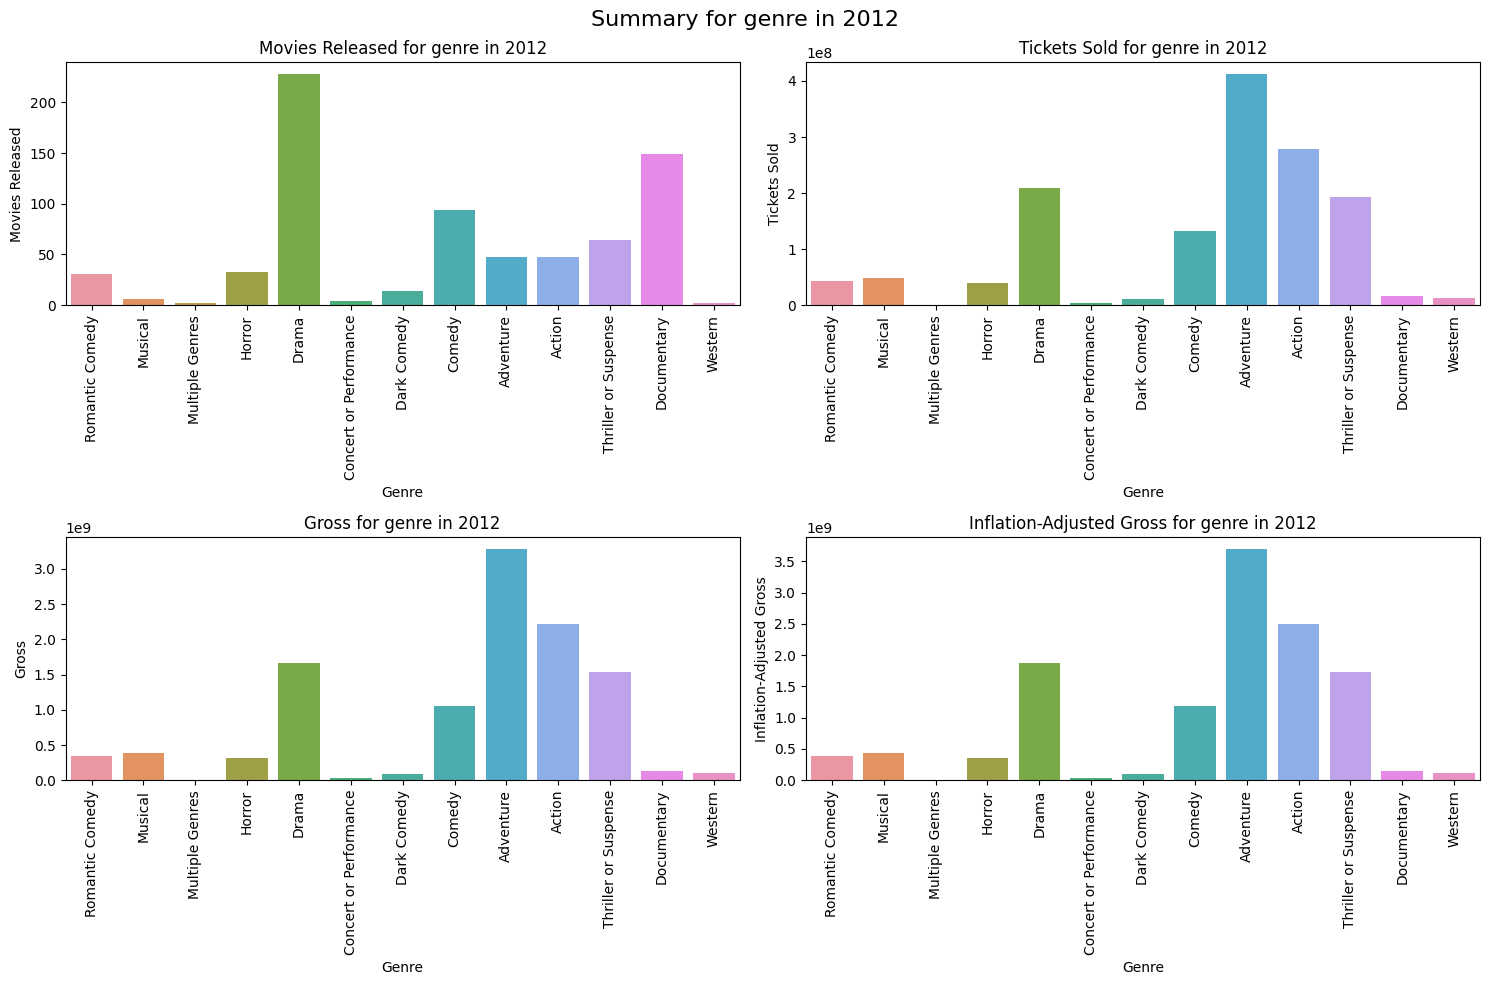

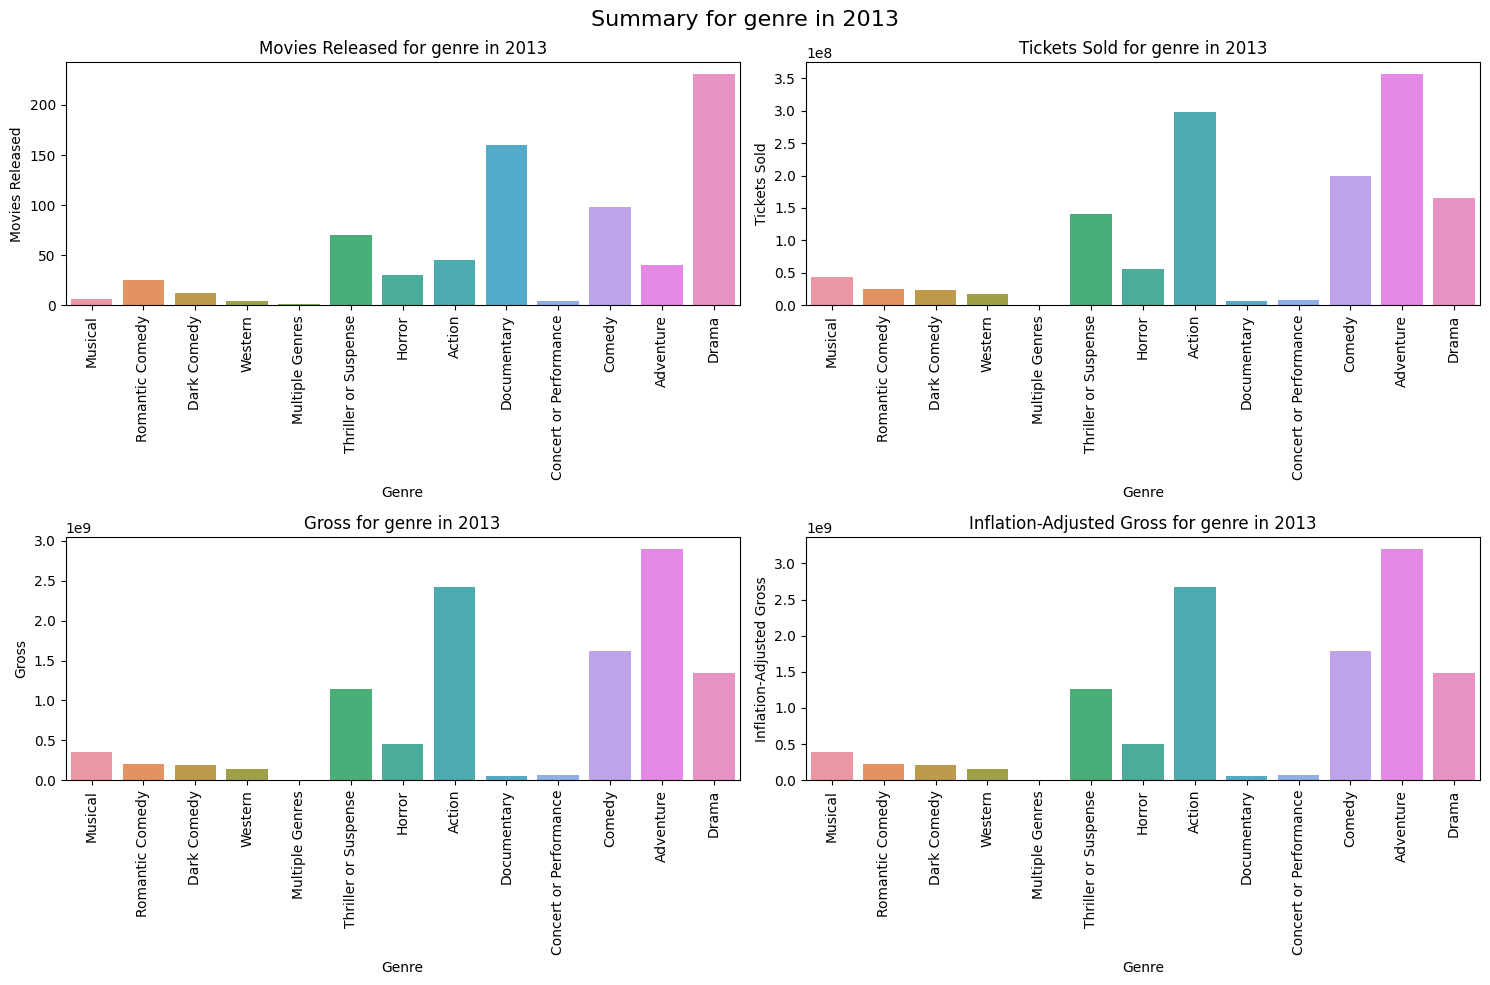

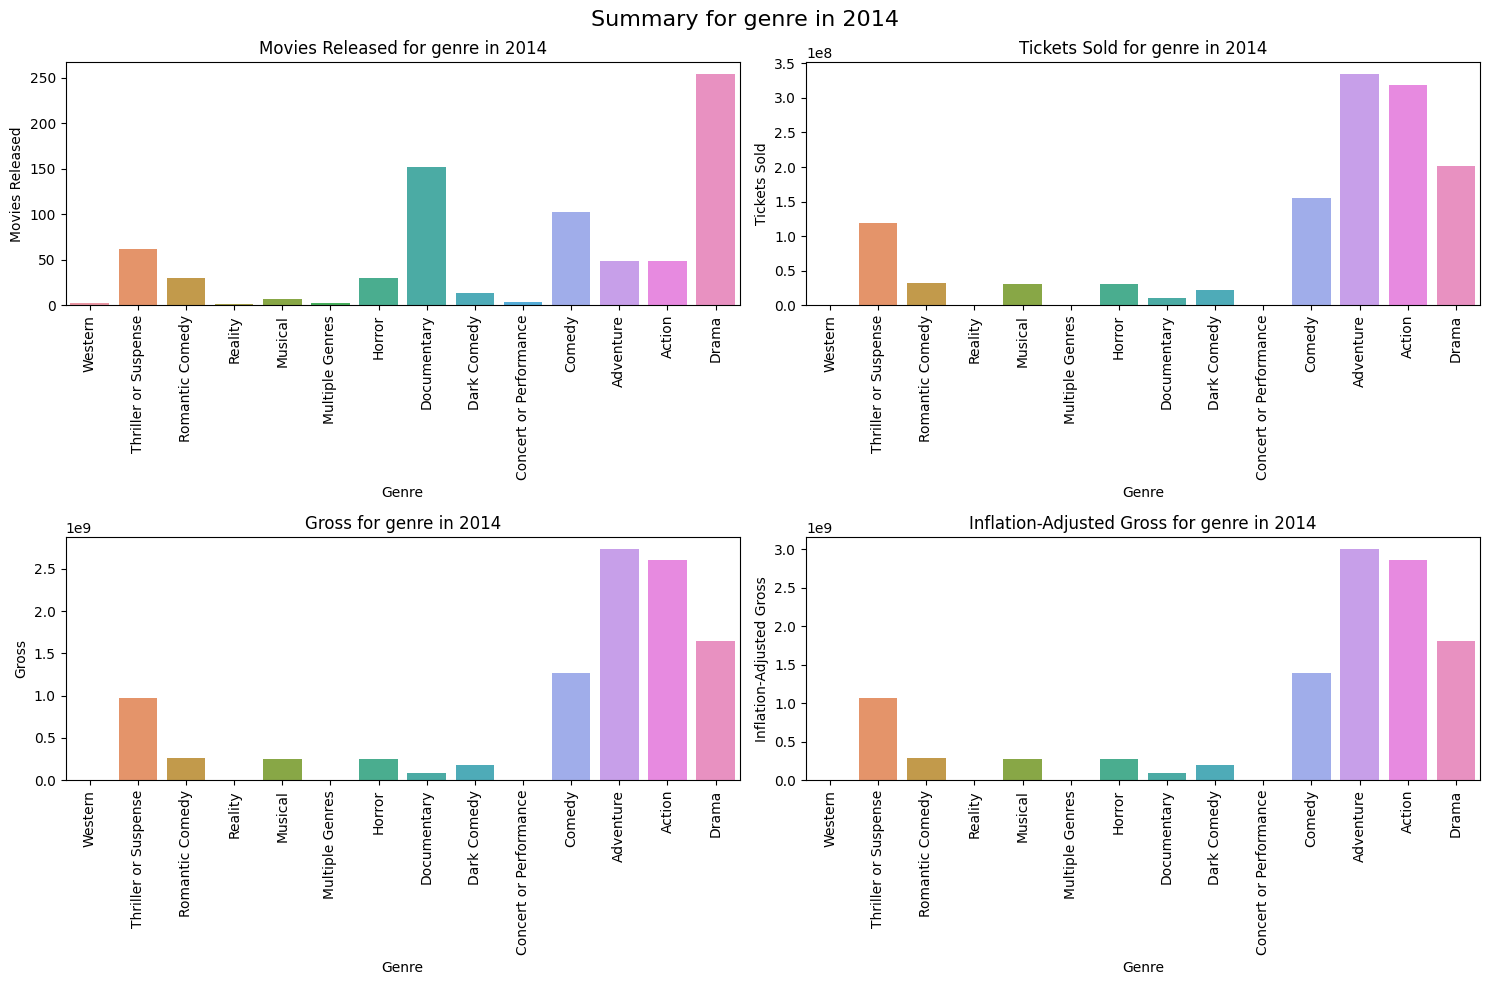

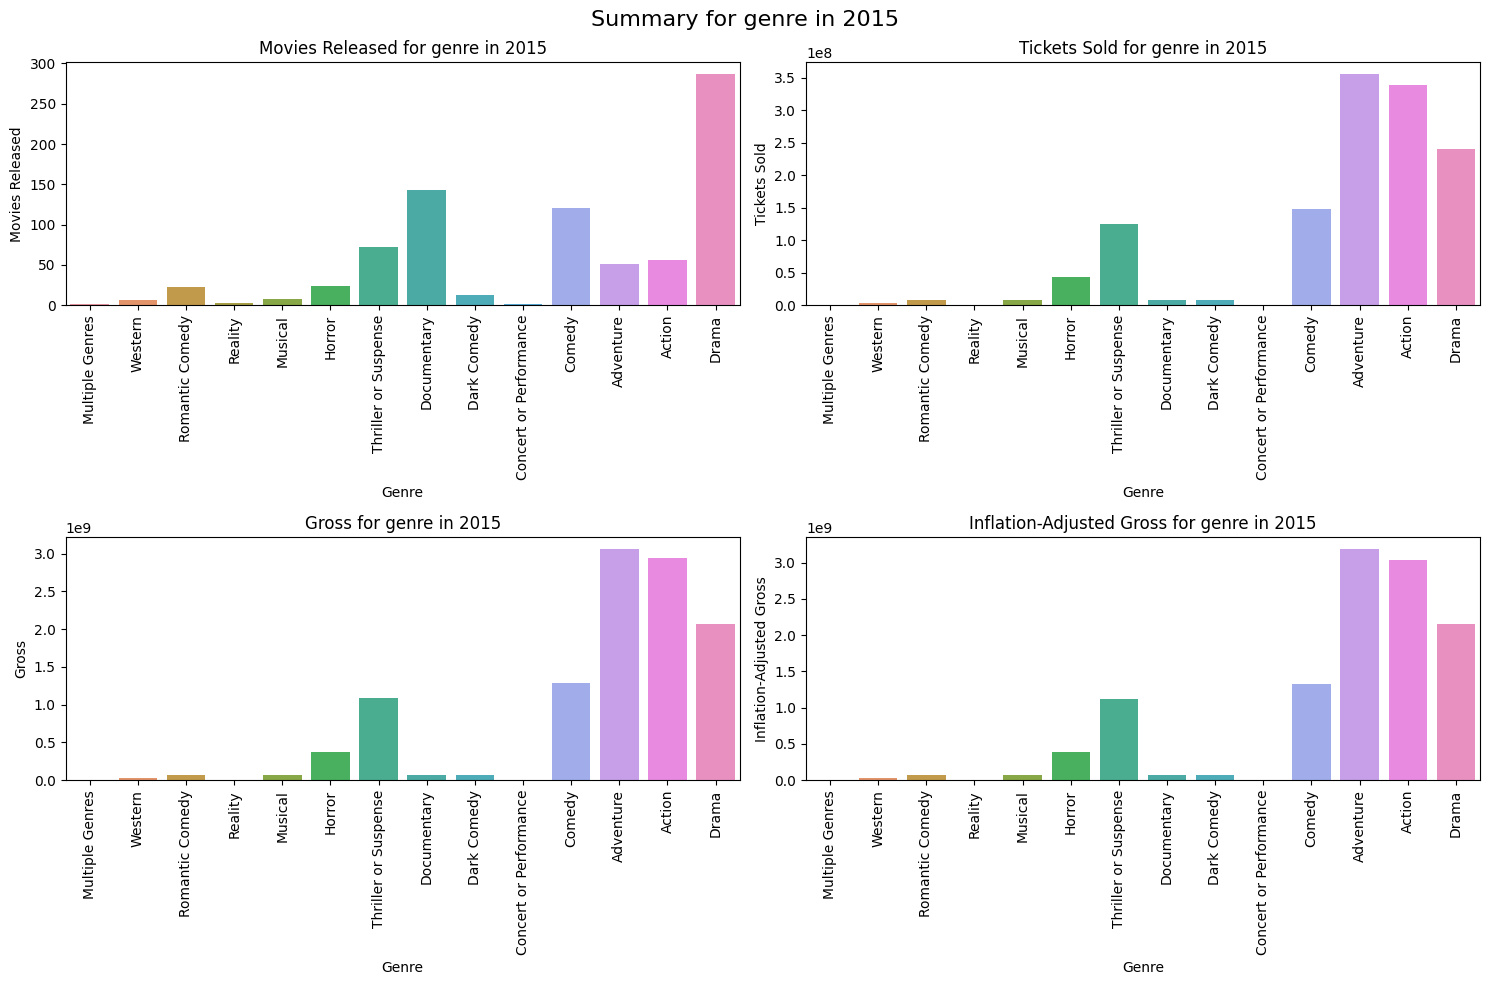

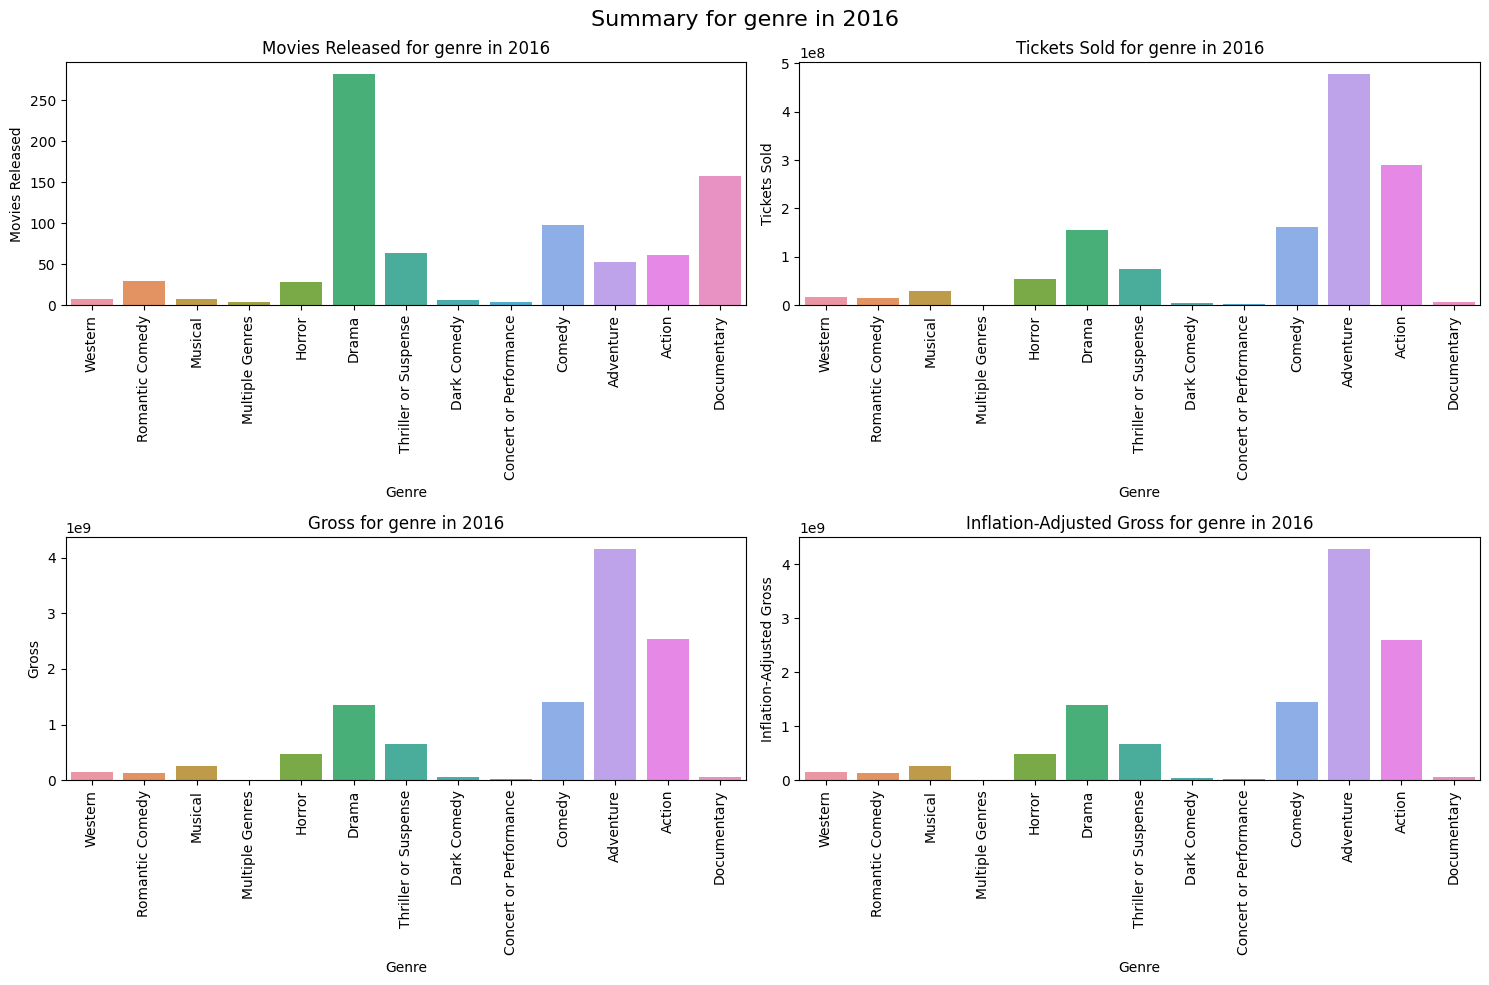

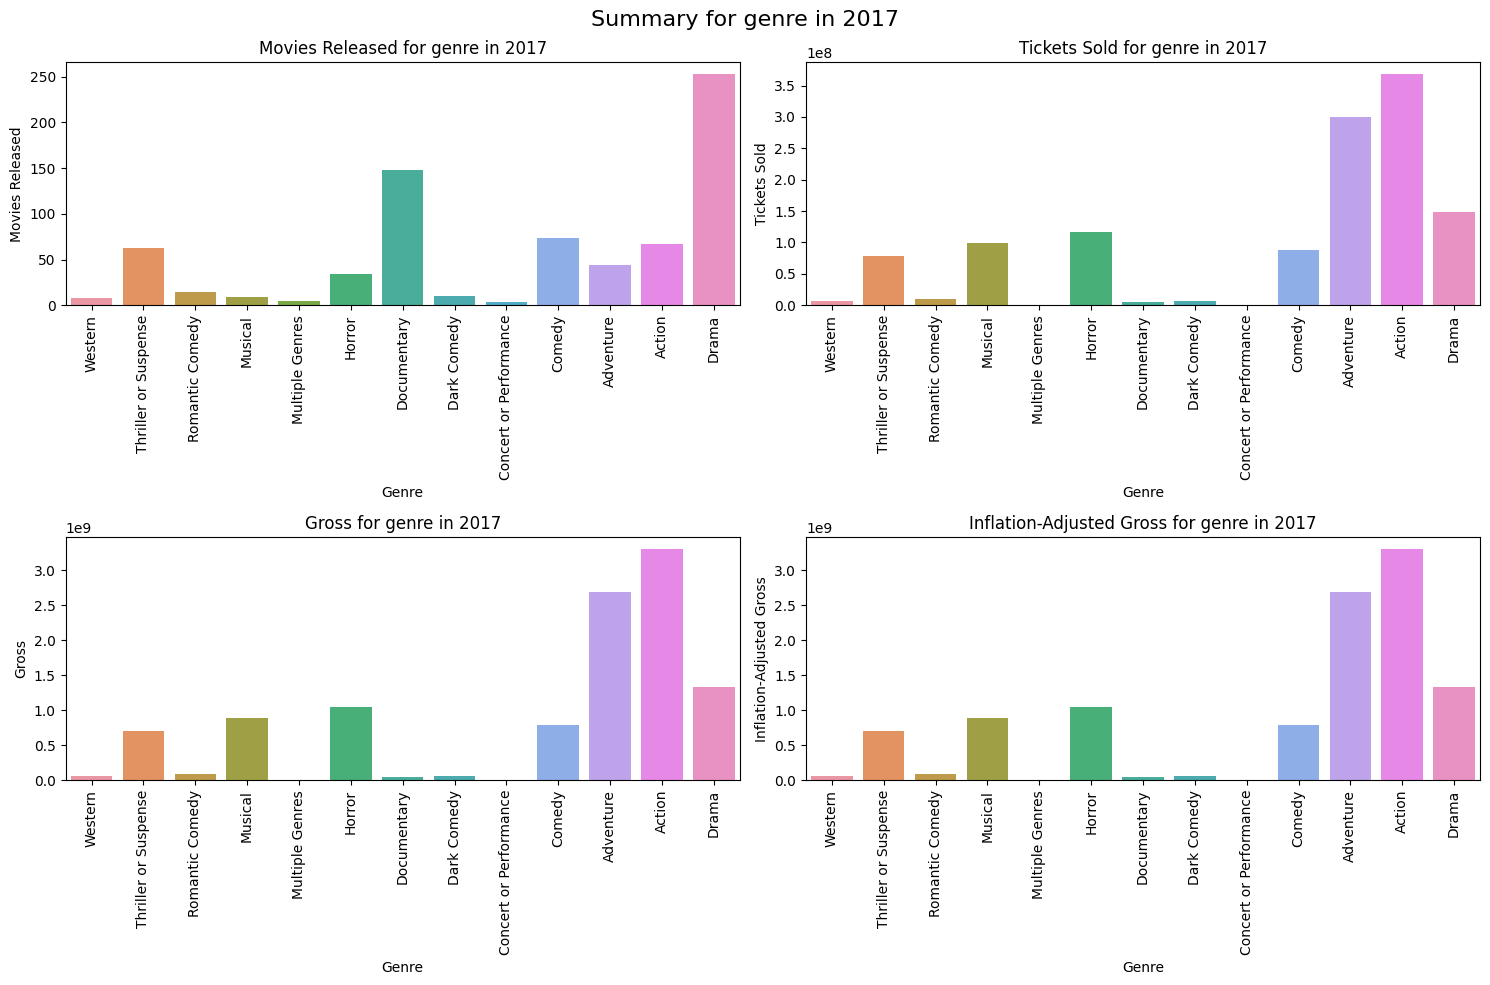

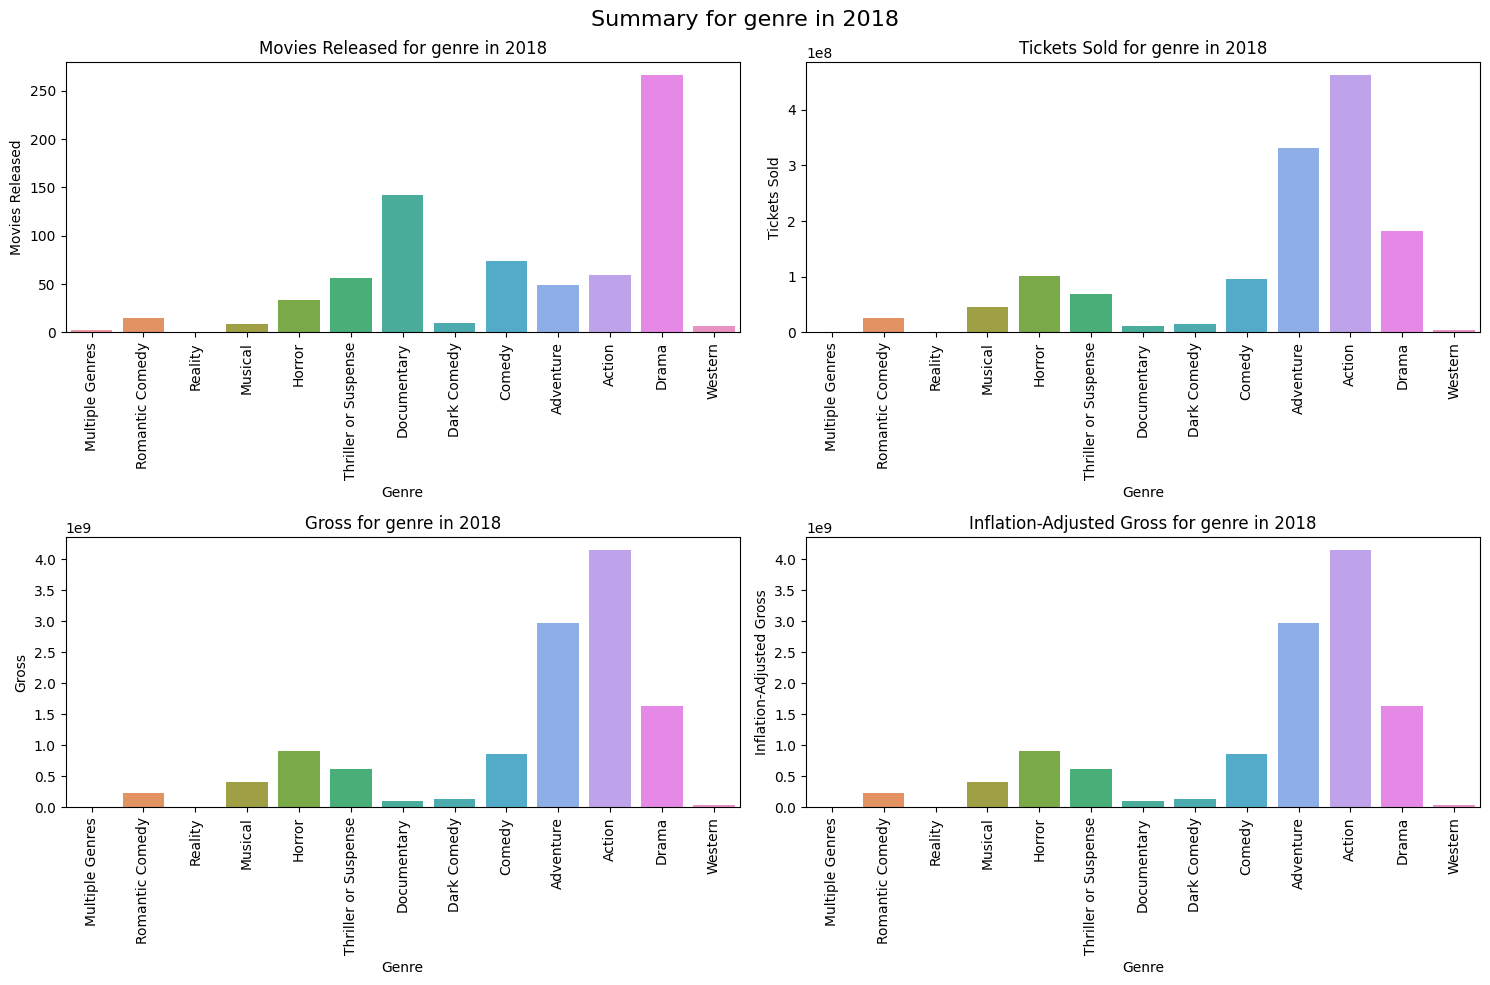

In [10]:
for y in f_data['Year'].unique():
  fig, axes = plt.subplots(nrows=2, ncols=int(len(f_year_genras_data.columns)/2), figsize=(15, 10))

  s_axes  = axes.flatten()
  c_axes=0
  plt.suptitle(f'Summary for genre in {y}', fontsize=16)
  for i in f_year_genras_data.columns:
    genre=f_year_genras_data.loc[y].iloc[:,:0].index
    sns.barplot(data=f_year_genras_data.loc[y],x=genre,y=i,ax=s_axes[c_axes])
    s_axes[c_axes].set_title(f'{i} for genre in {y}')
    s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
    c_axes+=1
  plt.subplots_adjust(wspace=0.7, hspace=0.7)
  plt.tight_layout()
  plt.show()

**relation between top movies and genre (top movie per genere in all years)**

In [11]:
f_data_top_movie_genars=f_data.pivot_table(values=['Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)'],index=['Genre','Top Movie'],aggfunc='max')
f_data_top_movie_genars=f_data_top_movie_genars.sort_values(by=['Genre','Top Movie Gross (That Year)'],ascending=False)
f_data_top_movie_genars=f_data_top_movie_genars[['Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)']]
f_data_top_movie_genars=f_data_top_movie_genars.groupby('Genre').head(1)
f_data_top_movie_genars=f_data_top_movie_genars.sort_values(by='Top Movie Gross (That Year)',ascending=False)
f_data_top_movie_genars

,,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
Genre,Top Movie,,
Adventure,Star Wars Ep. VII: The Force Awakens,742208942,7.728414e+08
Action,Black Panther,700059566,7.000595e+08
Musical,Beauty and the Beast,504014165,5.040141e+08
Thriller or Suspense,Titanic,443319081,8.478831e+08
Drama,The Passion of the Christ,370274604,5.348408e+08
Horror,It,327481748,3.274817e+08
Comedy,The Hangover,277322503,3.000819e+08
Romantic Comedy,My Big Fat Greek Wedding,227898505,3.518501e+08
Documentary,Fahrenheit 9/11,119114517,1.720541e+08


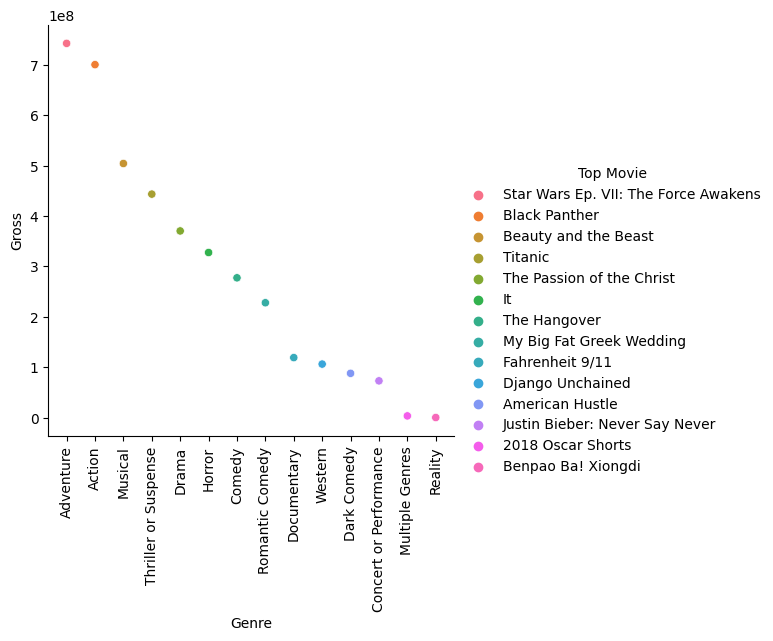

In [12]:
genre=f_data_top_movie_genars.index.get_level_values(0)
top_movies=f_data_top_movie_genars.index.get_level_values(1)
s=sns.relplot(data=f_data_top_movie_genars,x=genre,y='Top Movie Gross (That Year)',hue=top_movies)
s.set_xticklabels(rotation=90)
s.set_ylabels('Gross')

**relation between top movies and year (top movie per year in all genere)**

In [13]:
f_data_top_movie_year=f_data.pivot_table(values=['Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)'],index=['Year','Top Movie'],aggfunc='max')
f_data_top_movie_year=f_data_top_movie_year.sort_values(by=['Year','Top Movie Gross (That Year)'],ascending=False)
f_data_top_movie_year=f_data_top_movie_year[['Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)']]
f_data_top_movie_year=f_data_top_movie_year.groupby('Year').head(1)
f_data_top_movie_year=f_data_top_movie_year.sort_values(by='Year')
f_data_top_movie_year

,,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
Year,Top Movie,,
1995,Batman Forever,184031112,3.794848e+08
1996,Independence Day,306169255,6.213435e+08
1997,Men in Black,250650052,4.898324e+08
1998,Titanic,443319081,8.478831e+08
1999,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
2000,How the Grinch Stole Christmas,253367455,4.216523e+08
2001,Harry Potter and the Sorcerer’s Stone,300404434,4.760641e+08
2002,Spider-Man,403706375,6.232781e+08
2003,Finding Nemo,339714367,5.053462e+08


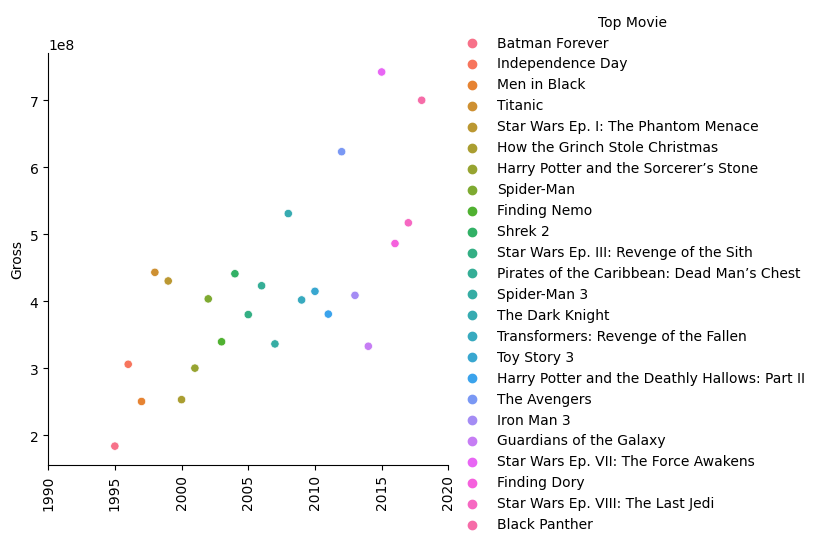

In [14]:
year=f_data_top_movie_year.index.get_level_values(0).tolist()
top_movies=f_data_top_movie_year.index.get_level_values(1)
s=sns.relplot(data=f_data_top_movie_year,x=year,y='Top Movie Gross (That Year)',hue=top_movies)
s.set_xticklabels(rotation=90)
plt.ylabel('Gross')
plt.show()


Correlation between Movies Released,Tickets Sold,Gross and Inflation-Adjusted Gross

Text(0.5, 1.0, 'Correlation Analysis of Engagement Metrics')

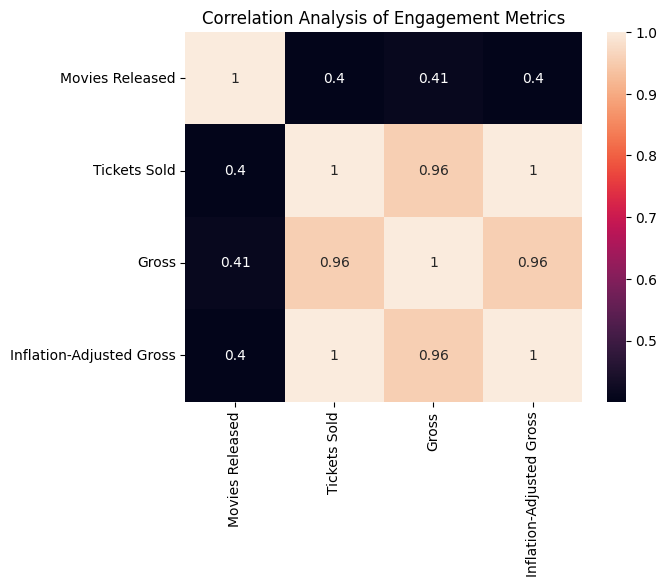

In [15]:
import matplotlib.ticker as mticker

# Correlation analysis
correlation_matrix=f_data[['Movies Released','Tickets Sold','Gross','Inflation-Adjusted Gross']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Analysis of Engagement Metrics")

**Correlation between Top Movie Gross (That Year) and Top Movie Inflation-Adjusted Gross (That Year) **

Text(0.5, 1.0, 'Correlation Analysis of Engagement Metrics')

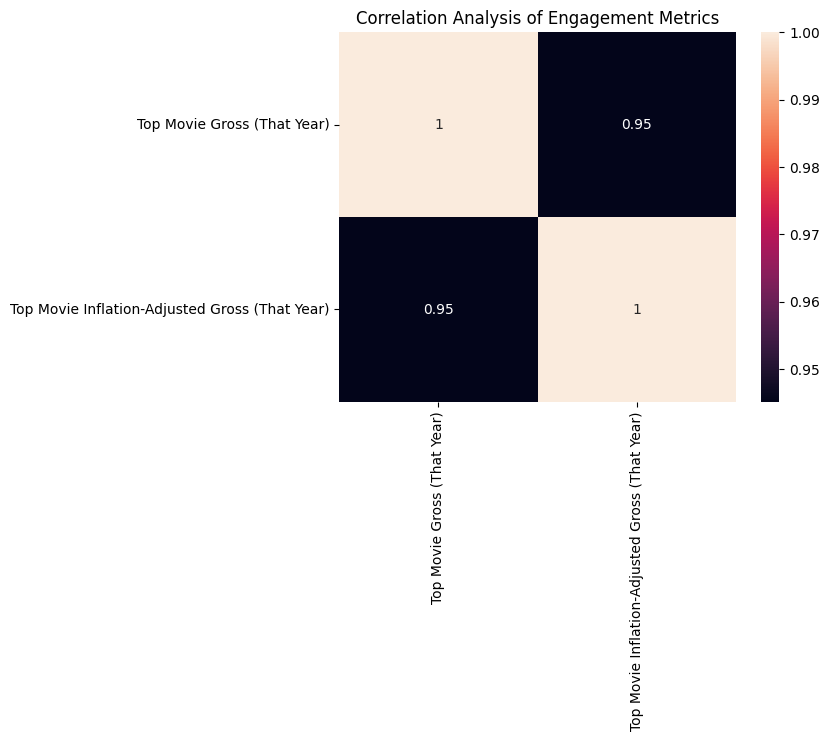

In [16]:
import matplotlib.ticker as mticker

# Correlation analysis
correlation_matrix=f_data[['Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Analysis of Engagement Metrics")